# Marketing Dataset Download

This notebook downloads the digital marketing conversion prediction dataset from Kaggle.


In [286]:
import kagglehub


In [287]:
# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/predict-conversion-in-digital-marketing-dataset")


In [288]:
print("Path to dataset files:", path)


Path to dataset files: C:\Users\Zain\.cache\kagglehub\datasets\rabieelkharoua\predict-conversion-in-digital-marketing-dataset\versions\1


In [289]:
import os
import pandas as pd

# List files in the downloaded directory
print("Files in dataset directory:")
for file in os.listdir(path):
    print(f"  - {file}")
    
# Find CSV files
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(f"\nCSV files found: {csv_files}")

Files in dataset directory:
  - digital_marketing_campaign_dataset.csv

CSV files found: ['digital_marketing_campaign_dataset.csv']


In [290]:
# Load the CSV file(s) directly with pandas
if csv_files:
    # If there's only one CSV, load it; otherwise load the first one
    csv_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(csv_path)
    print(f"Loaded: {csv_files[0]}")
    
    # If there are multiple CSV files, you can load them separately
    if len(csv_files) > 1:
        print(f"\nNote: There are {len(csv_files)} CSV files. Currently loading: {csv_files[0]}")
        print(f"Other files: {csv_files[1:]}")
else:
    print("No CSV files found in the dataset directory")

Loaded: digital_marketing_campaign_dataset.csv


In [291]:
# Display dataset info and first few records
print("Dataset shape:", df.shape)
print("\nFirst 5 records:")
print(df.head())
print("\nDataset info:")
print(df.info())

Dataset shape: (8000, 20)

First 5 records:
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13

In [292]:
# Check Conversion column distribution
print("CONVERSION COLUMN DISTRIBUTION")
print("=" * 50)
print(df['Conversion'].value_counts())
print(f"\nTotal samples: {len(df)}")
print(f"Conversion = 0: {(df['Conversion'] == 0).sum()}")
print(f"Conversion = 1: {(df['Conversion'] == 1).sum()}")
print(f"\nPercentage:")
print(df['Conversion'].value_counts(normalize=True) * 100)


CONVERSION COLUMN DISTRIBUTION
Conversion
1    7012
0     988
Name: count, dtype: int64

Total samples: 8000
Conversion = 0: 988
Conversion = 1: 7012

Percentage:
Conversion
1    87.65
0    12.35
Name: proportion, dtype: float64


In [293]:
# Balance the dataset: Take 1000 samples where Conversion=1, keep all where Conversion=0
print("BALANCING THE DATASET")
print("=" * 50)

# Separate the data
df_conversion_0 = df[df['Conversion'] == 0].copy()
df_conversion_1 = df[df['Conversion'] == 1].copy()

print(f"Original - Conversion=0: {len(df_conversion_0)} samples")
print(f"Original - Conversion=1: {len(df_conversion_1)} samples")

# Sample 1000 from Conversion=1 (if we have more than 1000)
if len(df_conversion_1) > 1000:
    df_conversion_1_sampled = df_conversion_1.sample(n=1000, random_state=42)
    print(f"\nSampled - Conversion=1: {len(df_conversion_1_sampled)} samples (randomly selected)")
else:
    df_conversion_1_sampled = df_conversion_1.copy()
    print(f"\nNote: Only {len(df_conversion_1_sampled)} samples with Conversion=1, keeping all")

# Combine the balanced dataset
df_balanced = pd.concat([df_conversion_0, df_conversion_1_sampled], ignore_index=True)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nBalanced dataset shape: {df_balanced.shape}")
print(f"\nNew distribution:")
print(df_balanced['Conversion'].value_counts())
print(f"\nNew percentages:")
print(df_balanced['Conversion'].value_counts(normalize=True) * 100)

# Update df to use balanced dataset
df = df_balanced.copy()
print("\n✓ Dataset balanced and ready for further processing")


BALANCING THE DATASET
Original - Conversion=0: 988 samples
Original - Conversion=1: 7012 samples

Sampled - Conversion=1: 1000 samples (randomly selected)

Balanced dataset shape: (1988, 20)

New distribution:
Conversion
1    1000
0     988
Name: count, dtype: int64

New percentages:
Conversion
1    50.301811
0    49.698189
Name: proportion, dtype: float64

✓ Dataset balanced and ready for further processing


In [294]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove CustomerID if it exists (it's an identifier, not a categorical feature)
if 'CustomerID' in categorical_cols:
    categorical_cols.remove('CustomerID')

print("CATEGORICAL COLUMNS IDENTIFIED")
print("=" * 50)
print(f"Number of categorical columns: {len(categorical_cols)}")
print(f"\nCategorical columns: {categorical_cols}")

# Show unique values for each categorical column
print("\n" + "=" * 50)
print("UNIQUE VALUES IN EACH CATEGORICAL COLUMN")
print("=" * 50)
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"\n{col}:")
    print(f"  Unique values ({len(unique_vals)}): {list(unique_vals)}")
    print(f"  Value counts:")
    print(df[col].value_counts())


CATEGORICAL COLUMNS IDENTIFIED
Number of categorical columns: 5

Categorical columns: ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']

UNIQUE VALUES IN EACH CATEGORICAL COLUMN

Gender:
  Unique values (2): ['Male', 'Female']
  Value counts:
Gender
Female    1185
Male       803
Name: count, dtype: int64

CampaignChannel:
  Unique values (5): ['SEO', 'Social Media', 'PPC', 'Referral', 'Email']
  Value counts:
CampaignChannel
Referral        427
PPC             408
Social Media    406
Email           384
SEO             363
Name: count, dtype: int64

CampaignType:
  Unique values (4): ['Consideration', 'Conversion', 'Retention', 'Awareness']
  Value counts:
CampaignType
Consideration    536
Awareness        518
Retention        502
Conversion       432
Name: count, dtype: int64

AdvertisingPlatform:
  Unique values (1): ['IsConfid']
  Value counts:
AdvertisingPlatform
IsConfid    1988
Name: count, dtype: int64

AdvertisingTool:
  Unique values (1): 

In [295]:
# Apply one-hot encoding to categorical columns
print("APPLYING ONE-HOT ENCODING")
print("=" * 50)

# Store the original column names
original_cols = df.columns.tolist()
print(f"Original number of columns: {len(original_cols)}")

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, drop_first=False)

print(f"\nAfter one-hot encoding: {df_encoded.shape[1]} columns")
print(f"New columns added: {df_encoded.shape[1] - len(original_cols)}")

# Show the new column names
print("\nNew column names:")
print(df_encoded.columns.tolist())

# Update df to use encoded dataset
df = df_encoded.copy()

print("\n✓ One-hot encoding completed")


APPLYING ONE-HOT ENCODING
Original number of columns: 20

After one-hot encoding: 28 columns
New columns added: 8

New column names:
['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion', 'Gender_Female', 'Gender_Male', 'CampaignChannel_Email', 'CampaignChannel_PPC', 'CampaignChannel_Referral', 'CampaignChannel_SEO', 'CampaignChannel_Social Media', 'CampaignType_Awareness', 'CampaignType_Consideration', 'CampaignType_Conversion', 'CampaignType_Retention', 'AdvertisingPlatform_IsConfid', 'AdvertisingTool_ToolConfid']

✓ One-hot encoding completed


In [296]:
# Display final dataset info
print("FINAL DATASET SUMMARY")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nColumn names ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")


FINAL DATASET SUMMARY
Shape: (1988, 28)

First few rows:
   CustomerID  Age  Income      AdSpend  ClickThroughRate  ConversionRate  \
0       13704   54  147422  4332.833542          0.020931        0.101418   
1       15508   52   36150  2385.588901          0.068490        0.038195   
2        8512   46  143459  5236.782506          0.053581        0.068962   
3        8889   44  145176  5401.642257          0.119560        0.017023   
4        9221   48   99697   501.991697          0.085005        0.173580   

   WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  ...  \
0              6       8.745994    4.699430            68  ...   
1             16       2.589529   10.322066            63  ...   
2             18       7.320577    9.988181            28  ...   
3             23       2.592080    2.004490            97  ...   
4             35       9.823027    3.498797            37  ...   

   CampaignChannel_PPC  CampaignChannel_Referral  CampaignChannel_SEO  \
0         

In [297]:
# Import libraries for normality testing
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [298]:
# Identify numerical columns (exclude ID and target variable if needed)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove CustomerID and Conversion if they exist (as they might be identifiers/target)
if 'CustomerID' in numerical_cols:
    numerical_cols.remove('CustomerID')
if 'Conversion' in numerical_cols:
    numerical_cols.remove('Conversion')

print(f"Numerical features to test: {len(numerical_cols)}")
print(f"\nFeatures: {numerical_cols}")


Numerical features to test: 13

Features: ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']


In [299]:
# Perform normality tests on all numerical features
normality_results = []

for col in numerical_cols:
    # Remove any NaN values for testing
    data = df[col].dropna()
    
    if len(data) > 3:  # Need at least 3 samples for tests
        # Shapiro-Wilk test (good for small to medium samples)
        if len(data) <= 5000:  # Shapiro-Wilk works best with n <= 5000
            stat_sw, p_value_sw = stats.shapiro(data)
            shapiro_result = f"p={p_value_sw:.6f}"
        else:
            stat_sw, p_value_sw = None, None
            shapiro_result = "N/A (n>5000)"
        
        # Kolmogorov-Smirnov test
        stat_ks, p_value_ks = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
        
        # D'Agostino's K-squared test (tests skewness and kurtosis)
        stat_da, p_value_da = stats.normaltest(data)
        
        # Store results
        normality_results.append({
            'Feature': col,
            'Shapiro-Wilk p-value': p_value_sw if p_value_sw else None,
            'Kolmogorov-Smirnov p-value': p_value_ks,
            "D'Agostino p-value": p_value_da,
            'Normal (α=0.05)': 'Yes' if (p_value_sw and p_value_sw > 0.05) or (p_value_ks > 0.05 and p_value_da > 0.05) else 'No'
        })

# Create results dataframe
normality_df = pd.DataFrame(normality_results)
print("NORMALITY TEST RESULTS")
print("=" * 80)
print("\nNote: p-value > 0.05 suggests normal distribution")
print("\n", normality_df.to_string(index=False))


NORMALITY TEST RESULTS

Note: p-value > 0.05 suggests normal distribution

           Feature  Shapiro-Wilk p-value  Kolmogorov-Smirnov p-value  D'Agostino p-value Normal (α=0.05)
              Age          2.268717e-24                1.334999e-08        0.000000e+00              No
           Income          4.374012e-25                2.426016e-07        0.000000e+00              No
          AdSpend          2.604226e-24                7.312307e-08       8.455541e-174              No
 ClickThroughRate          2.227612e-27                3.149451e-14        0.000000e+00              No
   ConversionRate          9.020865e-28                9.040679e-14        0.000000e+00              No
    WebsiteVisits          1.565059e-26                2.263170e-13        0.000000e+00              No
    PagesPerVisit          2.725696e-28                7.584295e-15        0.000000e+00              No
       TimeOnSite          6.482507e-27                1.626055e-13        0.000000e+00     

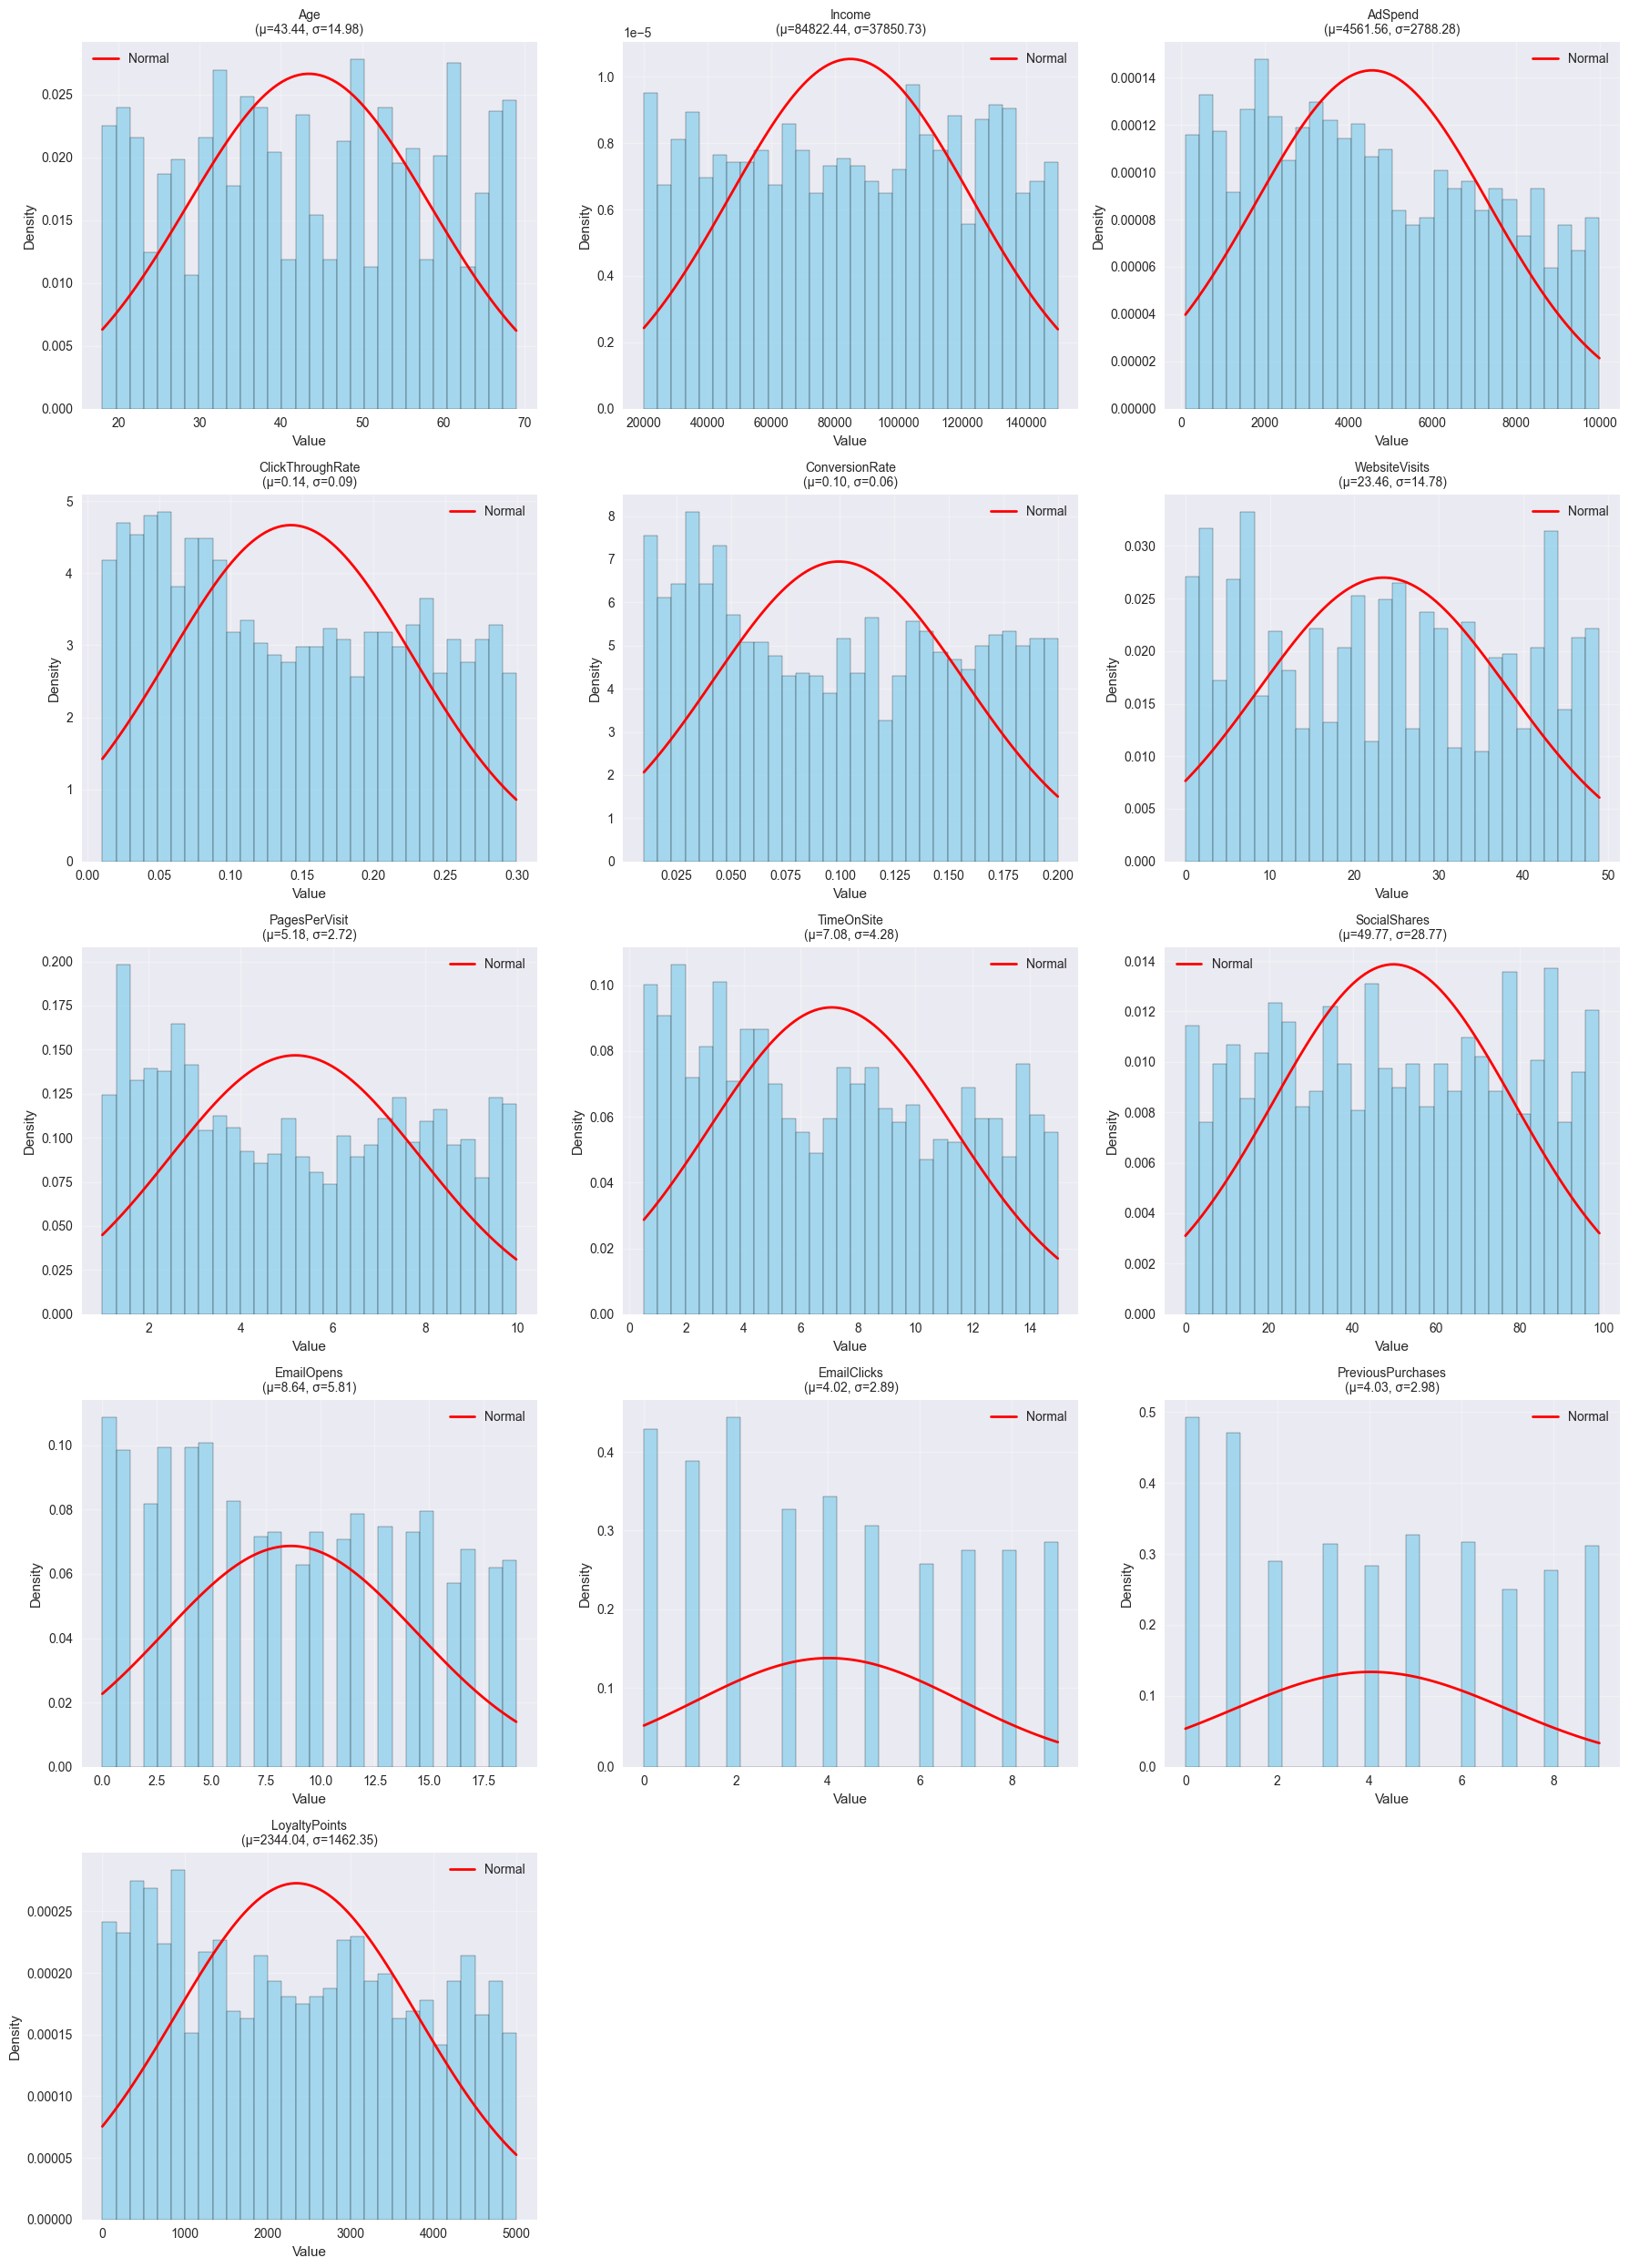

In [300]:
# Visualize distributions with histograms and Q-Q plots
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        ax = axes[idx]
        
        # Histogram with normal curve overlay
        data = df[col].dropna()
        ax.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
        
        # Overlay normal distribution
        mu, sigma = data.mean(), data.std()
        x = np.linspace(data.min(), data.max(), 100)
        ax.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')
        
        ax.set_title(f'{col}\n(μ={mu:.2f}, σ={sigma:.2f})', fontsize=10)
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


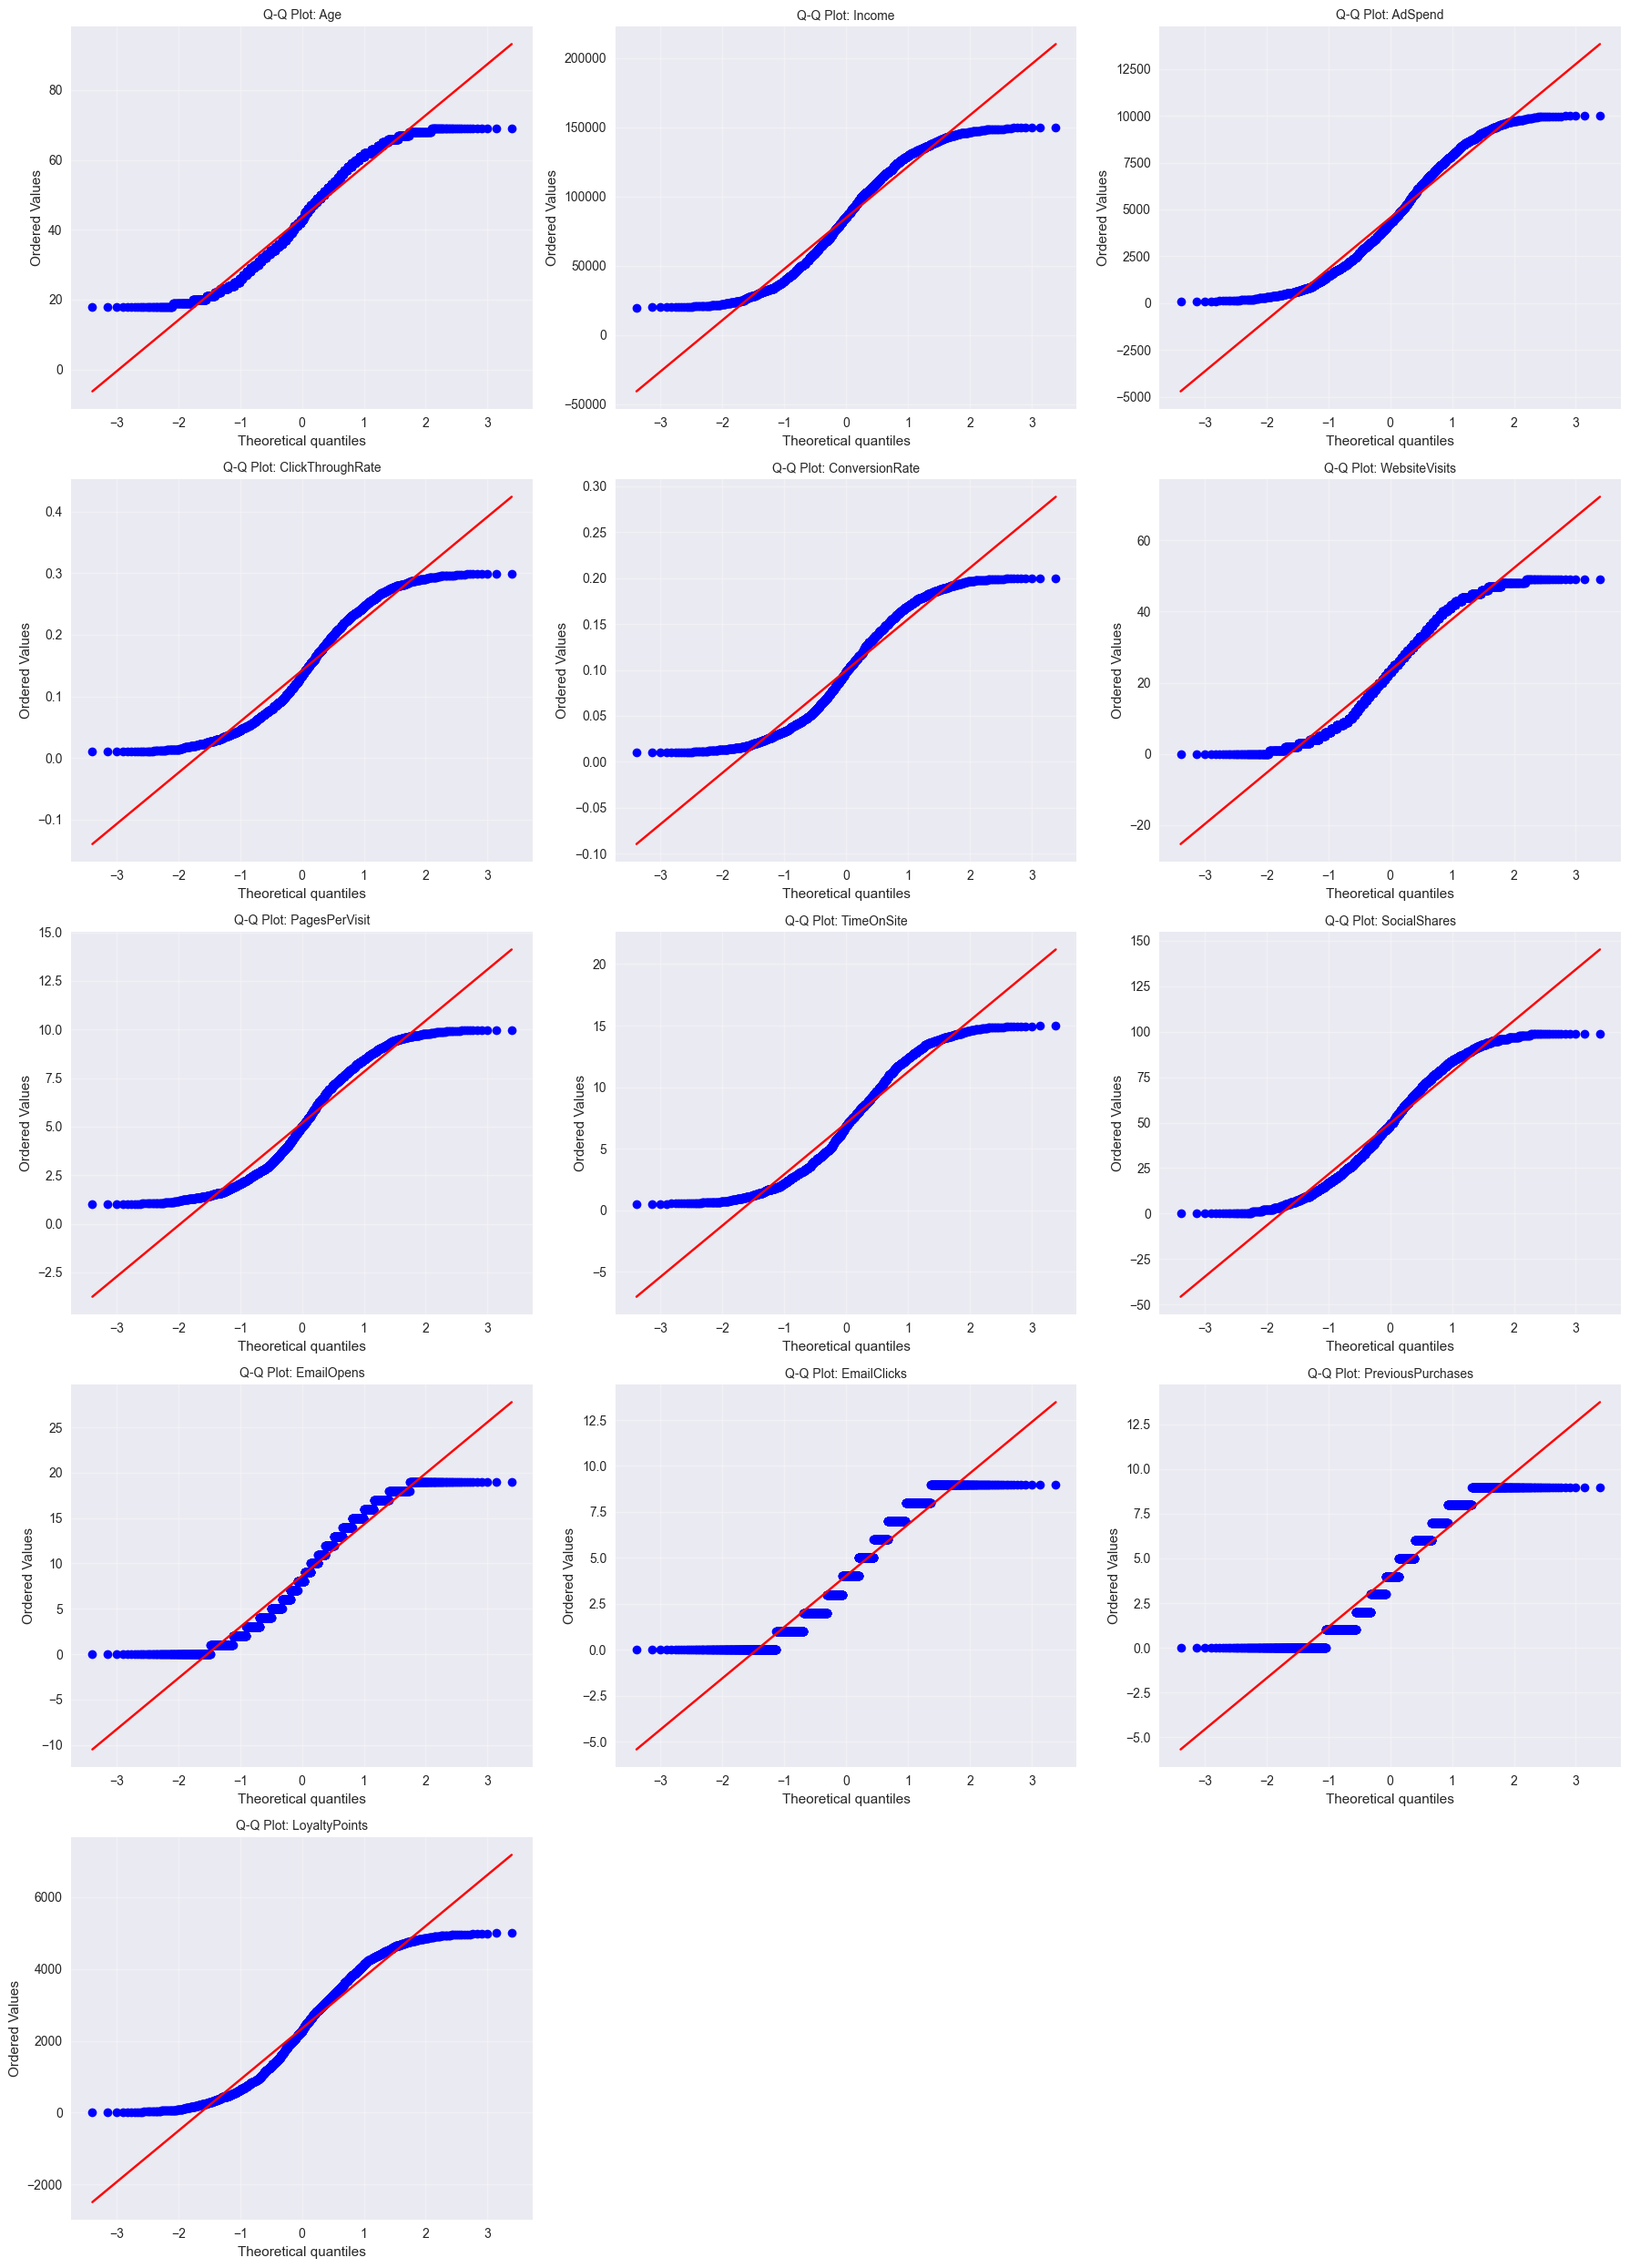

In [301]:
# Q-Q plots to visually assess normality
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        ax = axes[idx]
        data = df[col].dropna()
        
        # Q-Q plot
        stats.probplot(data, dist="norm", plot=ax)
        ax.set_title(f'Q-Q Plot: {col}', fontsize=10)
        ax.grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


In [302]:
# Summary statistics for skewness and kurtosis
print("SKEWNESS AND KURTOSIS ANALYSIS")
print("=" * 80)
print("\nSkewness: |skew| > 1 indicates significant deviation from normal")
print("Kurtosis: |kurtosis| > 3 indicates heavy/light tails compared to normal\n")

summary_stats = []
for col in numerical_cols:
    data = df[col].dropna()
    skew = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    summary_stats.append({
        'Feature': col,
        'Skewness': f"{skew:.4f}",
        'Kurtosis': f"{kurtosis:.4f}",
        'Interpretation': 'Normal-like' if abs(skew) < 1 and abs(kurtosis) < 3 else 'Non-normal'
    })

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))


SKEWNESS AND KURTOSIS ANALYSIS

Skewness: |skew| > 1 indicates significant deviation from normal
Kurtosis: |kurtosis| > 3 indicates heavy/light tails compared to normal

          Feature Skewness Kurtosis Interpretation
              Age   0.0201  -1.1883    Normal-like
           Income  -0.0260  -1.2304    Normal-like
          AdSpend   0.2257  -1.1007    Normal-like
 ClickThroughRate   0.1939  -1.2511    Normal-like
   ConversionRate   0.1154  -1.3024    Normal-like
    WebsiteVisits   0.0816  -1.2495    Normal-like
    PagesPerVisit   0.1432  -1.3098    Normal-like
       TimeOnSite   0.1984  -1.2191    Normal-like
     SocialShares   0.0046  -1.2096    Normal-like
       EmailOpens   0.1745  -1.2082    Normal-like
      EmailClicks   0.2405  -1.1801    Normal-like
PreviousPurchases   0.1898  -1.2630    Normal-like
    LoyaltyPoints   0.1140  -1.2269    Normal-like


# K-Nearest Neighbors (KNN) Classification

Implementing KNN model to predict conversion.


In [303]:
# Comprehensive evaluation metrics function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def comprehensive_evaluation(y_true, y_pred, y_pred_proba=None, model_name=""):
    """
    Calculate comprehensive evaluation metrics for a classification model.
    
    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - y_pred_proba: Predicted probabilities (for ROC-AUC)
    - model_name: Name of the model (for display)
    
    Returns:
    - Dictionary with all metrics
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)  # Also called Sensitivity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    # ROC-AUC (requires probabilities)
    roc_auc = None
    if y_pred_proba is not None:
        try:
            roc_auc = roc_auc_score(y_true, y_pred_proba)
        except:
            roc_auc = None
    
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall (Sensitivity)': recall,
        'Specificity': specificity,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn
    }
    
    # Print results
    print(f"\n{'='*60}")
    print(f"COMPREHENSIVE EVALUATION METRICS - {model_name}")
    print(f"{'='*60}")
    print(f"\nConfusion Matrix:")
    print(f"                Predicted")
    print(f"              No Conv  Conv")
    print(f"Actual No Conv   {tn:4d}   {fp:4d}")
    print(f"      Conv       {fn:4d}   {tp:4d}")
    
    print(f"\nPerformance Metrics:")
    print(f"  Accuracy:        {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision:       {precision:.4f} ({precision*100:.2f}%)")
    print(f"  Recall (Sensitivity): {recall:.4f} ({recall*100:.2f}%)")
    print(f"  Specificity:     {specificity:.4f} ({specificity*100:.2f}%)")
    print(f"  F1-Score:        {f1:.4f} ({f1*100:.2f}%)")
    if roc_auc is not None:
        print(f"  ROC-AUC:         {roc_auc:.4f} ({roc_auc*100:.2f}%)")
    else:
        print(f"  ROC-AUC:         N/A (probabilities not available)")
    
    return metrics


In [304]:
# Import libraries for KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")


Libraries imported successfully


In [305]:
# Prepare features and target
# Separate the target variable (Conversion) from features
# Exclude CustomerID as it's just an identifier, not a predictive feature
X = df.drop(['Conversion', 'CustomerID'], axis=1)
y = df['Conversion']

print("DATA PREPARATION")
print("=" * 50)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nTarget distribution (%):")
print(y.value_counts(normalize=True) * 100)


DATA PREPARATION
Features shape: (1988, 26)
Target shape: (1988,)

Target distribution:
Conversion
1    1000
0     988
Name: count, dtype: int64

Target distribution (%):
Conversion
1    50.301811
0    49.698189
Name: proportion, dtype: float64


In [306]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("TRAIN-TEST SPLIT")
print("=" * 50)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining target distribution:")
print(y_train.value_counts())
print(f"\nTest target distribution:")
print(y_test.value_counts())


TRAIN-TEST SPLIT
Training set: 1590 samples
Test set: 398 samples

Training target distribution:
Conversion
1    800
0    790
Name: count, dtype: int64

Test target distribution:
Conversion
1    200
0    198
Name: count, dtype: int64


In [307]:
# Feature scaling (important for KNN as it's distance-based)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("FEATURE SCALING")
print("=" * 50)
print("Features scaled using StandardScaler")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")
print(f"\nScaled feature statistics (first 5 features):")
print(f"Mean: {X_train_scaled[:, :5].mean(axis=0)}")
print(f"Std: {X_train_scaled[:, :5].std(axis=0)}")


FEATURE SCALING
Features scaled using StandardScaler
Scaled training set shape: (1590, 26)
Scaled test set shape: (398, 26)

Scaled feature statistics (first 5 features):
Mean: [-5.69774835e-17 -1.66463628e-16  1.16189378e-16 -1.76518478e-16
 -6.47979224e-17]
Std: [1. 1. 1. 1. 1.]


In [308]:
# Train KNN classifier
# Start with k=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("KNN MODEL TRAINING")
print("=" * 50)
print("KNN model trained with k=5")
print(f"Number of features: {X_train_scaled.shape[1]}")
print(f"Training samples: {X_train_scaled.shape[0]}")


KNN MODEL TRAINING
KNN model trained with k=5
Number of features: 26
Training samples: 1590


In [309]:
# Make predictions
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Get probabilities for ROC-AUC
y_test_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Comprehensive evaluation
print("MODEL EVALUATION - KNN")
print("=" * 50)
train_metrics = comprehensive_evaluation(y_train, y_train_pred, model_name="KNN (Train)")
test_metrics = comprehensive_evaluation(y_test, y_test_pred, y_test_pred_proba, model_name="KNN (Test)")


MODEL EVALUATION - KNN

COMPREHENSIVE EVALUATION METRICS - KNN (Train)

Confusion Matrix:
                Predicted
              No Conv  Conv
Actual No Conv    567    223
      Conv        151    649

Performance Metrics:
  Accuracy:        0.7648 (76.48%)
  Precision:       0.7443 (74.43%)
  Recall (Sensitivity): 0.8113 (81.12%)
  Specificity:     0.7177 (71.77%)
  F1-Score:        0.7763 (77.63%)
  ROC-AUC:         N/A (probabilities not available)

COMPREHENSIVE EVALUATION METRICS - KNN (Test)

Confusion Matrix:
                Predicted
              No Conv  Conv
Actual No Conv    120     78
      Conv         67    133

Performance Metrics:
  Accuracy:        0.6357 (63.57%)
  Precision:       0.6303 (63.03%)
  Recall (Sensitivity): 0.6650 (66.50%)
  Specificity:     0.6061 (60.61%)
  F1-Score:        0.6472 (64.72%)
  ROC-AUC:         0.6591 (65.91%)


In [310]:
# Detailed classification report
print("CLASSIFICATION REPORT")
print("=" * 50)
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['No Conversion', 'Conversion']))


CLASSIFICATION REPORT

Test Set Classification Report:
               precision    recall  f1-score   support

No Conversion       0.64      0.61      0.62       198
   Conversion       0.63      0.67      0.65       200

     accuracy                           0.64       398
    macro avg       0.64      0.64      0.64       398
 weighted avg       0.64      0.64      0.64       398



In [311]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

print("CONFUSION MATRIX")
print("=" * 50)
print("\nConfusion Matrix:")
print(cm)
print("\nConfusion Matrix (Formatted):")
print(f"                Predicted")
print(f"              No Conv  Conv")
print(f"Actual No Conv   {cm[0][0]:4d}   {cm[0][1]:4d}")
print(f"      Conv       {cm[1][0]:4d}   {cm[1][1]:4d}")

# Calculate metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Additional metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nPrecision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


CONFUSION MATRIX

Confusion Matrix:
[[120  78]
 [ 67 133]]

Confusion Matrix (Formatted):
                Predicted
              No Conv  Conv
Actual No Conv    120     78
      Conv         67    133

True Negatives (TN): 120
False Positives (FP): 78
False Negatives (FN): 67
True Positives (TP): 133

Precision: 0.6303
Recall (Sensitivity): 0.6650
F1-Score: 0.6472


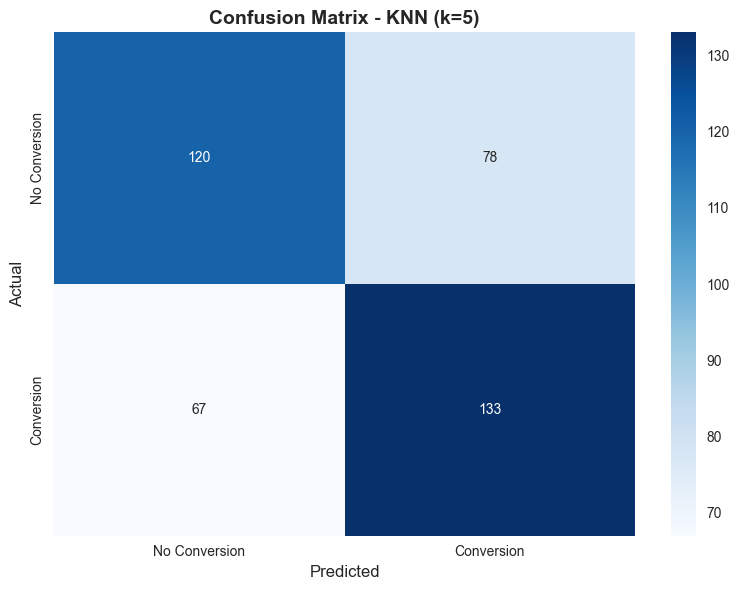

In [312]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
plt.title('Confusion Matrix - KNN (k=5)', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()


In [313]:
# Find optimal k value using cross-validation
from sklearn.model_selection import cross_val_score

print("FINDING OPTIMAL K VALUE")
print("=" * 50)

# Test different k values
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print(f"k={k:2d}: Mean CV Accuracy = {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

# Find best k
best_k = k_range[np.argmax(k_scores)]
best_score = max(k_scores)

print(f"\nBest k: {best_k} with CV accuracy: {best_score:.4f}")


FINDING OPTIMAL K VALUE
k= 1: Mean CV Accuracy = 0.5774 (+/- 0.0588)
k= 2: Mean CV Accuracy = 0.5667 (+/- 0.0354)
k= 3: Mean CV Accuracy = 0.6050 (+/- 0.0315)
k= 4: Mean CV Accuracy = 0.5994 (+/- 0.0370)
k= 5: Mean CV Accuracy = 0.6094 (+/- 0.0418)
k= 6: Mean CV Accuracy = 0.6038 (+/- 0.0487)
k= 7: Mean CV Accuracy = 0.6226 (+/- 0.0358)
k= 8: Mean CV Accuracy = 0.6252 (+/- 0.0679)
k= 9: Mean CV Accuracy = 0.6252 (+/- 0.0650)
k=10: Mean CV Accuracy = 0.6201 (+/- 0.0713)
k=11: Mean CV Accuracy = 0.6220 (+/- 0.0638)
k=12: Mean CV Accuracy = 0.6314 (+/- 0.0747)
k=13: Mean CV Accuracy = 0.6277 (+/- 0.0673)
k=14: Mean CV Accuracy = 0.6264 (+/- 0.0796)
k=15: Mean CV Accuracy = 0.6390 (+/- 0.0679)
k=16: Mean CV Accuracy = 0.6333 (+/- 0.0660)
k=17: Mean CV Accuracy = 0.6384 (+/- 0.0697)
k=18: Mean CV Accuracy = 0.6365 (+/- 0.0682)
k=19: Mean CV Accuracy = 0.6497 (+/- 0.0566)
k=20: Mean CV Accuracy = 0.6572 (+/- 0.0650)

Best k: 20 with CV accuracy: 0.6572


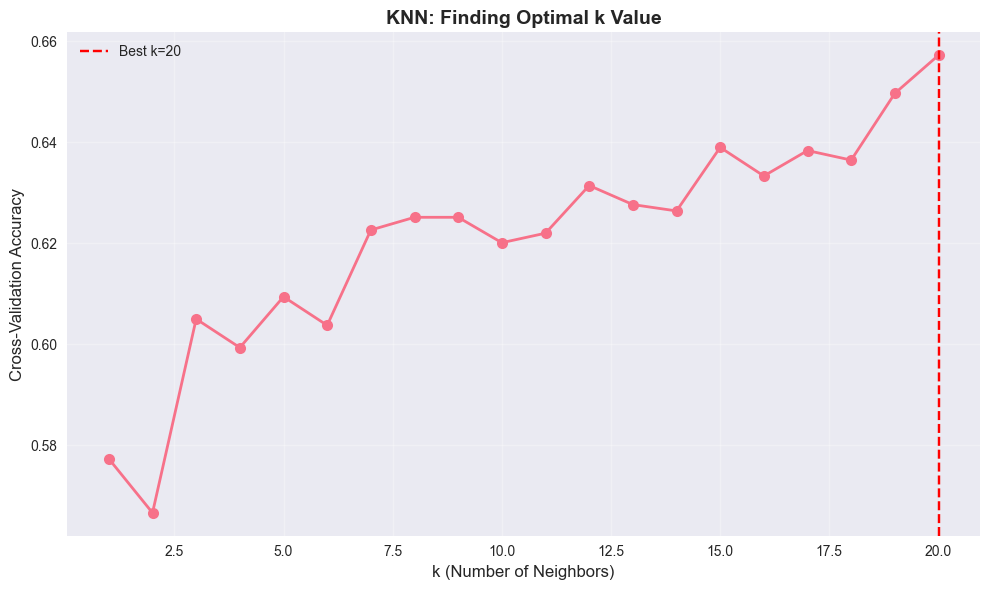

In [314]:
# Visualize k values vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('KNN: Finding Optimal k Value', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [315]:
# Train final model with optimal k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

# Make predictions with optimal model
y_test_pred_final = knn_final.predict(X_test_scaled)
test_accuracy_final = accuracy_score(y_test, y_test_pred_final)

print("FINAL MODEL WITH OPTIMAL K")
print("=" * 50)
print(f"Optimal k: {best_k}")
print(f"Final Test Accuracy: {test_accuracy_final:.4f} ({test_accuracy_final*100:.2f}%)")
print("\nFinal Classification Report:")
print(classification_report(y_test, y_test_pred_final, target_names=['No Conversion', 'Conversion']))


FINAL MODEL WITH OPTIMAL K
Optimal k: 20
Final Test Accuracy: 0.6809 (68.09%)

Final Classification Report:
               precision    recall  f1-score   support

No Conversion       0.68      0.68      0.68       198
   Conversion       0.68      0.68      0.68       200

     accuracy                           0.68       398
    macro avg       0.68      0.68      0.68       398
 weighted avg       0.68      0.68      0.68       398



# Model Optimization - Improving KNN Performance

Trying different distance metrics, weights, scaling methods, and feature selection to improve results.


In [316]:
# Try different distance metrics and weights
from sklearn.preprocessing import MinMaxScaler, RobustScaler

print("TESTING DIFFERENT DISTANCE METRICS AND WEIGHTS")
print("=" * 60)

# Test different combinations
metrics_to_test = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
weights_to_test = ['uniform', 'distance']

results = []

for metric in metrics_to_test:
    for weight in weights_to_test:
        knn_test = KNeighborsClassifier(
            n_neighbors=best_k, 
            metric=metric, 
            weights=weight
        )
        scores = cross_val_score(knn_test, X_train_scaled, y_train, cv=5, scoring='accuracy')
        mean_score = scores.mean()
        std_score = scores.std()
        results.append({
            'Metric': metric,
            'Weights': weight,
            'CV Accuracy': f"{mean_score:.4f}",
            'Std': f"{std_score:.4f}"
        })
        print(f"Metric: {metric:12s} | Weights: {weight:8s} | CV Accuracy: {mean_score:.4f} (+/- {std_score*2:.4f})")

results_df = pd.DataFrame(results)
best_combo = results_df.loc[results_df['CV Accuracy'].astype(float).idxmax()]
print(f"\nBest combination: {best_combo['Metric']} with {best_combo['Weights']} weights")
print(f"Best CV Accuracy: {best_combo['CV Accuracy']}")


TESTING DIFFERENT DISTANCE METRICS AND WEIGHTS
Metric: euclidean    | Weights: uniform  | CV Accuracy: 0.6572 (+/- 0.0650)
Metric: euclidean    | Weights: distance | CV Accuracy: 0.6535 (+/- 0.0438)
Metric: manhattan    | Weights: uniform  | CV Accuracy: 0.6660 (+/- 0.0770)
Metric: manhattan    | Weights: distance | CV Accuracy: 0.6698 (+/- 0.0737)
Metric: minkowski    | Weights: uniform  | CV Accuracy: 0.6572 (+/- 0.0650)
Metric: minkowski    | Weights: distance | CV Accuracy: 0.6535 (+/- 0.0438)
Metric: chebyshev    | Weights: uniform  | CV Accuracy: 0.6214 (+/- 0.0302)
Metric: chebyshev    | Weights: distance | CV Accuracy: 0.6189 (+/- 0.0312)

Best combination: manhattan with distance weights
Best CV Accuracy: 0.6698


In [317]:
# Try different scaling methods
print("TESTING DIFFERENT SCALING METHODS")
print("=" * 60)

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

scaling_results = []

for scaler_name, scaler in scalers.items():
    # Scale the data
    X_train_scaled_test = scaler.fit_transform(X_train)
    X_test_scaled_test = scaler.transform(X_test)
    
    # Test with best k and best metric/weight combo
    best_metric = best_combo['Metric']
    best_weight = best_combo['Weights']
    
    knn_test = KNeighborsClassifier(
        n_neighbors=best_k,
        metric=best_metric,
        weights=best_weight
    )
    scores = cross_val_score(knn_test, X_train_scaled_test, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    
    scaling_results.append({
        'Scaler': scaler_name,
        'CV Accuracy': mean_score
    })
    print(f"{scaler_name:20s}: CV Accuracy = {mean_score:.4f}")

scaling_df = pd.DataFrame(scaling_results)
best_scaler_name = scaling_df.loc[scaling_df['CV Accuracy'].idxmax(), 'Scaler']
best_scaler = scalers[best_scaler_name]

print(f"\nBest scaler: {best_scaler_name}")
print(f"Best CV Accuracy: {scaling_df.loc[scaling_df['CV Accuracy'].idxmax(), 'CV Accuracy']:.4f}")

# Re-scale with best scaler
X_train_scaled_optimized = best_scaler.fit_transform(X_train)
X_test_scaled_optimized = best_scaler.transform(X_test)


TESTING DIFFERENT SCALING METHODS
StandardScaler      : CV Accuracy = 0.6698
MinMaxScaler        : CV Accuracy = 0.6535
RobustScaler        : CV Accuracy = 0.6805

Best scaler: RobustScaler
Best CV Accuracy: 0.6805


In [318]:
# Feature selection using feature importance
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

print("FEATURE SELECTION")
print("=" * 60)

# Method 1: SelectKBest with f_classif
selector_f = SelectKBest(score_func=f_classif, k='all')
selector_f.fit(X_train_scaled_optimized, y_train)
feature_scores_f = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector_f.scores_
}).sort_values('F-Score', ascending=False)

print("Top 15 features by F-Score:")
print(feature_scores_f.head(15))

# Method 2: Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mi.fit(X_train_scaled_optimized, y_train)
feature_scores_mi = pd.DataFrame({
    'Feature': X.columns,
    'MI-Score': selector_mi.scores_
}).sort_values('MI-Score', ascending=False)

print("\nTop 15 features by Mutual Information:")
print(feature_scores_mi.head(15))

# Combine scores
feature_importance = pd.merge(
    feature_scores_f, 
    feature_scores_mi, 
    on='Feature'
)
feature_importance['Combined_Score'] = (
    feature_importance['F-Score'] / feature_importance['F-Score'].max() +
    feature_importance['MI-Score'] / feature_importance['MI-Score'].max()
) / 2
feature_importance = feature_importance.sort_values('Combined_Score', ascending=False)

print("\nTop 15 features by Combined Score:")
print(feature_importance.head(15))


FEATURE SELECTION
Top 15 features by F-Score:
                       Feature    F-Score
9                   EmailOpens  63.662430
7                   TimeOnSite  59.689879
22     CampaignType_Conversion  57.292177
4               ConversionRate  49.403559
2                      AdSpend  48.798072
10                 EmailClicks  46.639973
12               LoyaltyPoints  33.648249
3             ClickThroughRate  30.163855
11           PreviousPurchases  28.301833
6                PagesPerVisit  19.954071
5                WebsiteVisits  19.234496
20      CampaignType_Awareness   6.913236
23      CampaignType_Retention   5.732474
21  CampaignType_Consideration   4.055614
1                       Income   2.485684

Top 15 features by Mutual Information:
                       Feature  MI-Score
11           PreviousPurchases  0.037257
4               ConversionRate  0.034935
7                   TimeOnSite  0.033173
18         CampaignChannel_SEO  0.031812
21  CampaignType_Consideration  0.031

In [319]:
# Test different numbers of features
print("TESTING DIFFERENT NUMBERS OF FEATURES")
print("=" * 60)

# Check and create required variables if they don't exist
if 'X_train_scaled_optimized' not in globals() or X_train_scaled_optimized is None:
    print("Setting up required variables...")
    # Check if we have the basic data
    if 'X_train' not in globals() or 'y_train' not in globals():
        if 'df' in globals():
            X = df.drop(['Conversion', 'CustomerID'], axis=1)
            y = df['Conversion']
            from sklearn.model_selection import train_test_split
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42, stratify=y
            )
        else:
            raise NameError("Please run the data loading cells first (Cells 1-5)")
    
    # Scale the data if not already scaled
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    X_train_scaled_optimized = scaler.fit_transform(X_train)
    X_test_scaled_optimized = scaler.transform(X_test)
    print("Data scaled using RobustScaler.\n")

# Ensure feature_importance is defined (recalculate if needed)
if 'feature_importance' not in globals() or feature_importance is None:
    print("Calculating feature importance...")
    from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
    
    # Method 1: SelectKBest with f_classif
    selector_f = SelectKBest(score_func=f_classif, k='all')
    selector_f.fit(X_train_scaled_optimized, y_train)
    feature_scores_f = pd.DataFrame({
        'Feature': X.columns,
        'F-Score': selector_f.scores_
    }).sort_values('F-Score', ascending=False)
    
    # Method 2: Mutual Information
    selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
    selector_mi.fit(X_train_scaled_optimized, y_train)
    feature_scores_mi = pd.DataFrame({
        'Feature': X.columns,
        'MI-Score': selector_mi.scores_
    }).sort_values('MI-Score', ascending=False)
    
    # Combine scores
    feature_importance = pd.merge(
        feature_scores_f, 
        feature_scores_mi, 
        on='Feature'
    )
    feature_importance['Combined_Score'] = (
        feature_importance['F-Score'] / feature_importance['F-Score'].max() +
        feature_importance['MI-Score'] / feature_importance['MI-Score'].max()
    ) / 2
    feature_importance = feature_importance.sort_values('Combined_Score', ascending=False)
    print("Feature importance calculated.\n")

# Check for best_k and best_combo (from earlier optimization cells)
if 'best_k' not in globals():
    best_k = 20  # Default value
    print("Using default best_k=20 (run Cell 28 for optimal k)\n")

if 'best_combo' not in globals():
    # Create default best_combo
    best_combo = pd.Series({'Metric': 'euclidean', 'Weights': 'distance'})
    print("Using default metric='euclidean' and weights='distance' (run Cell 32 for optimal values)\n")

feature_counts = [10, 15, 20, 25, 30, 'all']
feature_selection_results = []

for n_features in feature_counts:
    if n_features == 'all':
        X_train_selected = X_train_scaled_optimized
        X_test_selected = X_test_scaled_optimized
        n_feat = X_train_scaled_optimized.shape[1]
    else:
        # Select top n features
        top_features = feature_importance.head(n_features)['Feature'].values
        feature_indices = [list(X.columns).index(f) for f in top_features]
        X_train_selected = X_train_scaled_optimized[:, feature_indices]
        X_test_selected = X_test_scaled_optimized[:, feature_indices]
        n_feat = n_features
    
    # Test with optimized parameters
    # Handle best_combo as Series or dict
    if isinstance(best_combo, pd.Series):
        metric = best_combo.loc['Metric'] if 'Metric' in best_combo.index else best_combo.get('Metric', 'euclidean')
        weights = best_combo.loc['Weights'] if 'Weights' in best_combo.index else best_combo.get('Weights', 'distance')
    else:
        metric = best_combo.get('Metric', 'euclidean')
        weights = best_combo.get('Weights', 'distance')
    
    knn_test = KNeighborsClassifier(
        n_neighbors=best_k,
        metric=metric,
        weights=weights
    )
    scores = cross_val_score(knn_test, X_train_selected, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    
    feature_selection_results.append({
        'N_Features': n_feat,
        'CV Accuracy': mean_score
    })
    print(f"Features: {str(n_feat):>3s} | CV Accuracy: {mean_score:.4f}")

feature_selection_df = pd.DataFrame(feature_selection_results)
best_n_features = feature_selection_df.loc[feature_selection_df['CV Accuracy'].idxmax(), 'N_Features']
print(f"\nBest number of features: {best_n_features}")
print(f"Best CV Accuracy: {feature_selection_df.loc[feature_selection_df['CV Accuracy'].idxmax(), 'CV Accuracy']:.4f}")

# Select best features
if best_n_features != 'all' and best_n_features < X_train_scaled_optimized.shape[1]:
    top_features = feature_importance.head(int(best_n_features))['Feature'].values
    feature_indices = [list(X.columns).index(f) for f in top_features]
    X_train_final = X_train_scaled_optimized[:, feature_indices]
    X_test_final = X_test_scaled_optimized[:, feature_indices]
    print(f"\nSelected {best_n_features} features: {list(top_features)}")
else:
    X_train_final = X_train_scaled_optimized
    X_test_final = X_test_scaled_optimized
    print(f"\nUsing all features")


TESTING DIFFERENT NUMBERS OF FEATURES


Features:  10 | CV Accuracy: 0.6987
Features:  15 | CV Accuracy: 0.7220
Features:  20 | CV Accuracy: 0.6918
Features:  25 | CV Accuracy: 0.6805
Features:  30 | CV Accuracy: 0.6805
Features:  26 | CV Accuracy: 0.6805

Best number of features: 15
Best CV Accuracy: 0.7220

Selected 15 features: ['TimeOnSite', 'CampaignType_Conversion', 'ConversionRate', 'EmailOpens', 'PreviousPurchases', 'EmailClicks', 'AdSpend', 'CampaignType_Consideration', 'CampaignChannel_SEO', 'ClickThroughRate', 'PagesPerVisit', 'LoyaltyPoints', 'WebsiteVisits', 'CampaignType_Retention', 'CampaignChannel_Referral']


In [320]:
# GridSearchCV for comprehensive hyperparameter tuning
from sklearn.model_selection import GridSearchCV

print("COMPREHENSIVE HYPERPARAMETER TUNING WITH GRIDSEARCH")
print("=" * 60)

# Define parameter grid
param_grid = {
    'n_neighbors': [15, 20, 25, 30, 35],
    'metric': [best_combo['Metric'], 'euclidean', 'manhattan'],
    'weights': [best_combo['Weights'], 'uniform', 'distance'],
    'p': [1, 2] if best_combo['Metric'] == 'minkowski' else [2]
}

print("Parameter grid:")
for key, value in param_grid.items():
    print(f"  {key}: {value}")

# Create base model
knn_grid = KNeighborsClassifier()

# Grid search with cross-validation
grid_search = GridSearchCV(
    knn_grid, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\nRunning GridSearchCV (this may take a while)...")
grid_search.fit(X_train_final, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Get best model
knn_optimized = grid_search.best_estimator_


COMPREHENSIVE HYPERPARAMETER TUNING WITH GRIDSEARCH
Parameter grid:
  n_neighbors: [15, 20, 25, 30, 35]
  metric: ['manhattan', 'euclidean', 'manhattan']
  weights: ['distance', 'uniform', 'distance']
  p: [2]

Running GridSearchCV (this may take a while)...
Fitting 5 folds for each of 45 candidates, totalling 225 fits

Best parameters: {'metric': 'manhattan', 'n_neighbors': 30, 'p': 2, 'weights': 'distance'}
Best CV score: 0.7333


In [321]:
# Train and evaluate the fully optimized model
knn_optimized.fit(X_train_final, y_train)

# Make predictions
y_train_pred_opt = knn_optimized.predict(X_train_final)
y_test_pred_opt = knn_optimized.predict(X_test_final)

# Calculate accuracies
train_accuracy_opt = accuracy_score(y_train, y_train_pred_opt)
test_accuracy_opt = accuracy_score(y_test, y_test_pred_opt)

print("OPTIMIZED MODEL RESULTS")
print("=" * 60)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"\nTraining Accuracy: {train_accuracy_opt:.4f} ({train_accuracy_opt*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_opt:.4f} ({test_accuracy_opt*100:.2f}%)")
print(f"\nCross-Validation Score: {grid_search.best_score_:.4f} ({grid_search.best_score_*100:.2f}%)")

print("\n" + "=" * 60)
print("DETAILED CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_test, y_test_pred_opt, target_names=['No Conversion', 'Conversion']))


OPTIMIZED MODEL RESULTS
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 30, 'p': 2, 'weights': 'distance'}

Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 0.7412 (74.12%)

Cross-Validation Score: 0.7333 (73.33%)

DETAILED CLASSIFICATION REPORT
               precision    recall  f1-score   support

No Conversion       0.74      0.74      0.74       198
   Conversion       0.74      0.74      0.74       200

     accuracy                           0.74       398
    macro avg       0.74      0.74      0.74       398
 weighted avg       0.74      0.74      0.74       398



In [322]:
# Compare original vs optimized model
print("MODEL COMPARISON")
print("=" * 60)
print(f"{'Metric':<30s} {'Original':<15s} {'Optimized':<15s} {'Improvement':<15s}")
print("-" * 60)

original_test_acc = test_accuracy_final
improvement = test_accuracy_opt - original_test_acc
improvement_pct = (improvement / original_test_acc) * 100

print(f"{'Test Accuracy':<30s} {original_test_acc:<15.4f} {test_accuracy_opt:<15.4f} {improvement:+.4f} ({improvement_pct:+.2f}%)")

# Calculate other metrics for comparison
from sklearn.metrics import precision_score, recall_score, f1_score

original_precision = precision_score(y_test, y_test_pred_final)
original_recall = recall_score(y_test, y_test_pred_final)
original_f1 = f1_score(y_test, y_test_pred_final)

optimized_precision = precision_score(y_test, y_test_pred_opt)
optimized_recall = recall_score(y_test, y_test_pred_opt)
optimized_f1 = f1_score(y_test, y_test_pred_opt)

print(f"{'Precision':<30s} {original_precision:<15.4f} {optimized_precision:<15.4f} {optimized_precision-original_precision:+.4f}")
print(f"{'Recall':<30s} {original_recall:<15.4f} {optimized_recall:<15.4f} {optimized_recall-original_recall:+.4f}")
print(f"{'F1-Score':<30s} {original_f1:<15.4f} {optimized_f1:<15.4f} {optimized_f1-original_f1:+.4f}")


MODEL COMPARISON
Metric                         Original        Optimized       Improvement    
------------------------------------------------------------
Test Accuracy                  0.6809          0.7412          +0.0603 (+8.86%)
Precision                      0.6834          0.7413          +0.0579
Recall                         0.6800          0.7450          +0.0650
F1-Score                       0.6817          0.7431          +0.0614


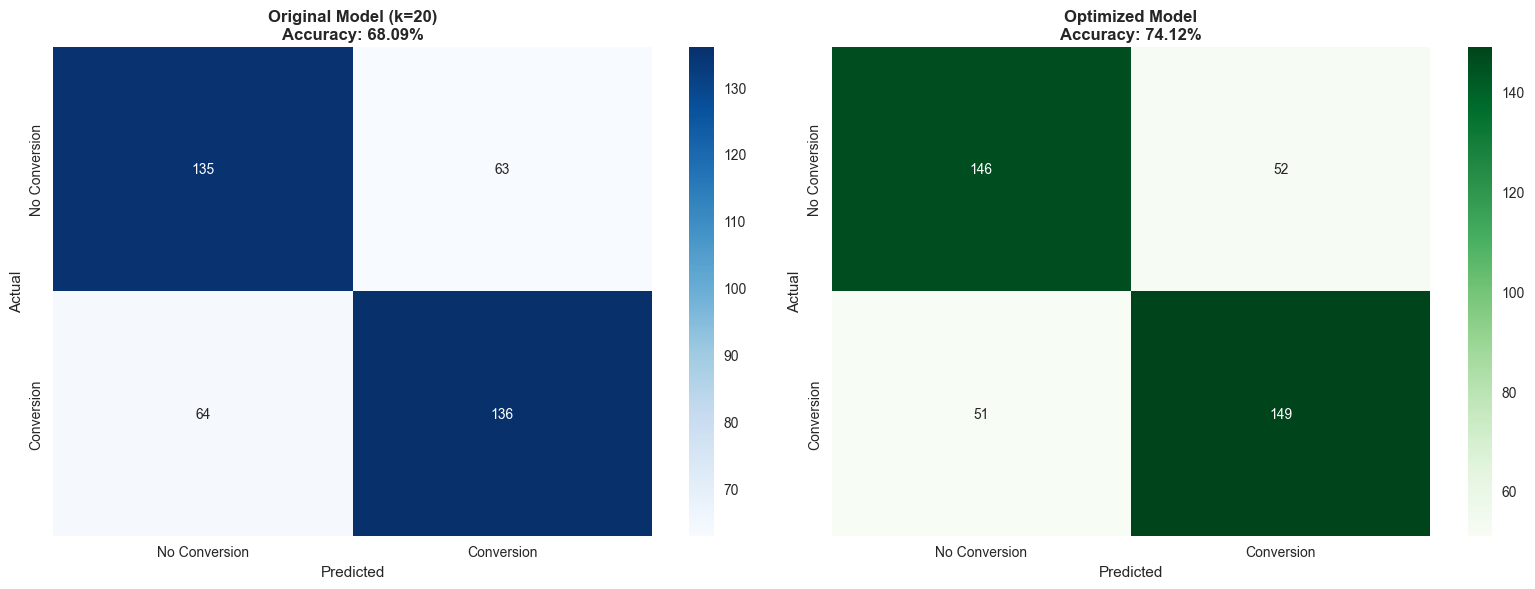

In [323]:
# Visualize confusion matrix for optimized model
cm_optimized = confusion_matrix(y_test, y_test_pred_opt)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original model
sns.heatmap(confusion_matrix(y_test, y_test_pred_final), annot=True, fmt='d', 
            cmap='Blues', ax=axes[0],
            xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
axes[0].set_title(f'Original Model (k={best_k})\nAccuracy: {original_test_acc:.2%}', 
                  fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=11)
axes[0].set_xlabel('Predicted', fontsize=11)

# Optimized model
sns.heatmap(cm_optimized, annot=True, fmt='d', 
            cmap='Greens', ax=axes[1],
            xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
axes[1].set_title(f'Optimized Model\nAccuracy: {test_accuracy_opt:.2%}', 
                  fontsize=12, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=11)
axes[1].set_xlabel('Predicted', fontsize=11)

plt.tight_layout()
plt.show()


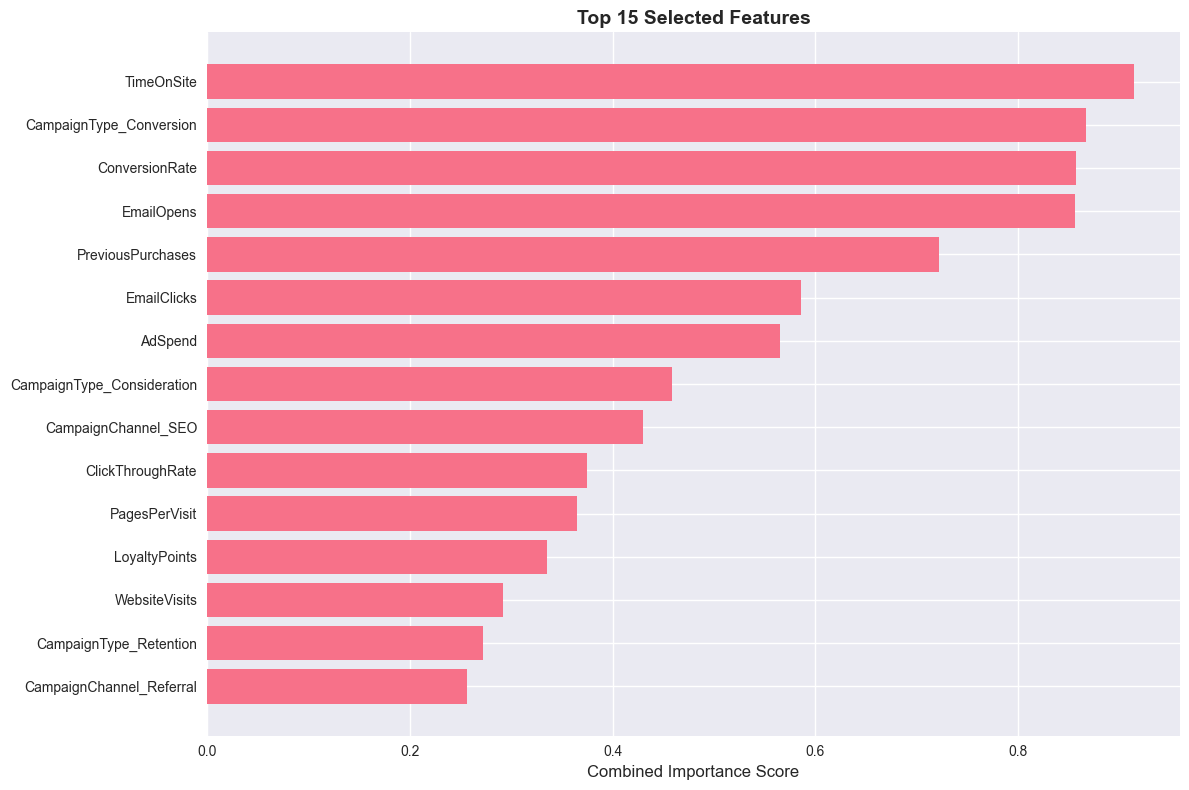


Selected Features Summary:
  Original features: 26
  Selected features: 15
  Reduction: 11 features removed


In [324]:
# Feature importance visualization (if we used feature selection)
if best_n_features != 'all' and best_n_features < X_train_scaled_optimized.shape[1]:
    plt.figure(figsize=(12, 8))
    top_features_viz = feature_importance.head(int(best_n_features))
    plt.barh(range(len(top_features_viz)), top_features_viz['Combined_Score'].values)
    plt.yticks(range(len(top_features_viz)), top_features_viz['Feature'].values)
    plt.xlabel('Combined Importance Score', fontsize=12)
    plt.title(f'Top {best_n_features} Selected Features', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print(f"\nSelected Features Summary:")
    print(f"  Original features: {X_train_scaled_optimized.shape[1]}")
    print(f"  Selected features: {best_n_features}")
    print(f"  Reduction: {X_train_scaled_optimized.shape[1] - best_n_features} features removed")


# Multiple ML Models Implementation

Implementing Decision Tree, SVM, ANN, and Ensemble methods for comparison.


In [325]:
# Prepare data for all models (use the balanced and encoded dataset)
# Reset to use the original balanced dataset if needed
print("PREPARING DATA FOR ALL MODELS")
print("=" * 60)

# Use the balanced dataset (df should already be balanced and encoded)
# If we need to reset, we'll use df_balanced from earlier
# For now, assume df is ready

# Prepare features and target (exclude CustomerID as it's just an identifier)
X_all = df.drop(['Conversion', 'CustomerID'], axis=1)
y_all = df['Conversion']

# Split data (use same split for fair comparison)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

print(f"Training set: {X_train_all.shape}")
print(f"Test set: {X_test_all.shape}")
print(f"\nTarget distribution (Train):")
print(y_train_all.value_counts())
print(f"\nTarget distribution (Test):")
print(y_test_all.value_counts())

# Store results for comparison
model_results = {}


PREPARING DATA FOR ALL MODELS
Training set: (1590, 26)
Test set: (398, 26)

Target distribution (Train):
Conversion
1    800
0    790
Name: count, dtype: int64

Target distribution (Test):
Conversion
1    200
0    198
Name: count, dtype: int64


## 2️⃣ Decision Tree


In [326]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

print("DECISION TREE MODEL")
print("=" * 60)

# Decision Tree can handle the data directly (no scaling needed, but it helps)
# Scale features for consistency
scaler_dt = StandardScaler()
X_train_dt = scaler_dt.fit_transform(X_train_all)
X_test_dt = scaler_dt.transform(X_test_all)

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_base = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt_base, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
dt_grid.fit(X_train_dt, y_train_all)

print(f"Best parameters: {dt_grid.best_params_}")
print(f"Best CV score: {dt_grid.best_score_:.4f}")

# Train final model
dt_model = dt_grid.best_estimator_
dt_model.fit(X_train_dt, y_train_all)

# Predictions
y_train_pred_dt = dt_model.predict(X_train_dt)
y_test_pred_dt = dt_model.predict(X_test_dt)

# Evaluation
train_acc_dt = accuracy_score(y_train_all, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test_all, y_test_pred_dt)

print(f"\nTraining Accuracy: {train_acc_dt:.4f} ({train_acc_dt*100:.2f}%)")
print(f"Test Accuracy: {test_acc_dt:.4f} ({test_acc_dt*100:.2f}%)")

# Store results
model_results['Decision Tree'] = {
    'train_acc': train_acc_dt,
    'test_acc': test_acc_dt,
    'model': dt_model,
    'predictions': y_test_pred_dt
}

print("\nClassification Report:")
print(classification_report(y_test_all, y_test_pred_dt, target_names=['No Conversion', 'Conversion']))


DECISION TREE MODEL
Fitting 5 folds for each of 90 candidates, totalling 450 fits


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV score: 0.6616

Training Accuracy: 0.7484 (74.84%)
Test Accuracy: 0.6910 (69.10%)

Classification Report:
               precision    recall  f1-score   support

No Conversion       0.70      0.66      0.68       198
   Conversion       0.68      0.72      0.70       200

     accuracy                           0.69       398
    macro avg       0.69      0.69      0.69       398
 weighted avg       0.69      0.69      0.69       398



TOP 15 MOST IMPORTANT FEATURES (Decision Tree)
                         Feature  Importance
4                 ConversionRate    0.149018
7                     TimeOnSite    0.130817
2                        AdSpend    0.128685
9                     EmailOpens    0.104214
12                 LoyaltyPoints    0.088744
22       CampaignType_Conversion    0.078089
11             PreviousPurchases    0.072001
5                  WebsiteVisits    0.069061
10                   EmailClicks    0.064016
3               ClickThroughRate    0.060681
1                         Income    0.022846
17      CampaignChannel_Referral    0.013986
0                            Age    0.011072
6                  PagesPerVisit    0.006771
19  CampaignChannel_Social Media    0.000000


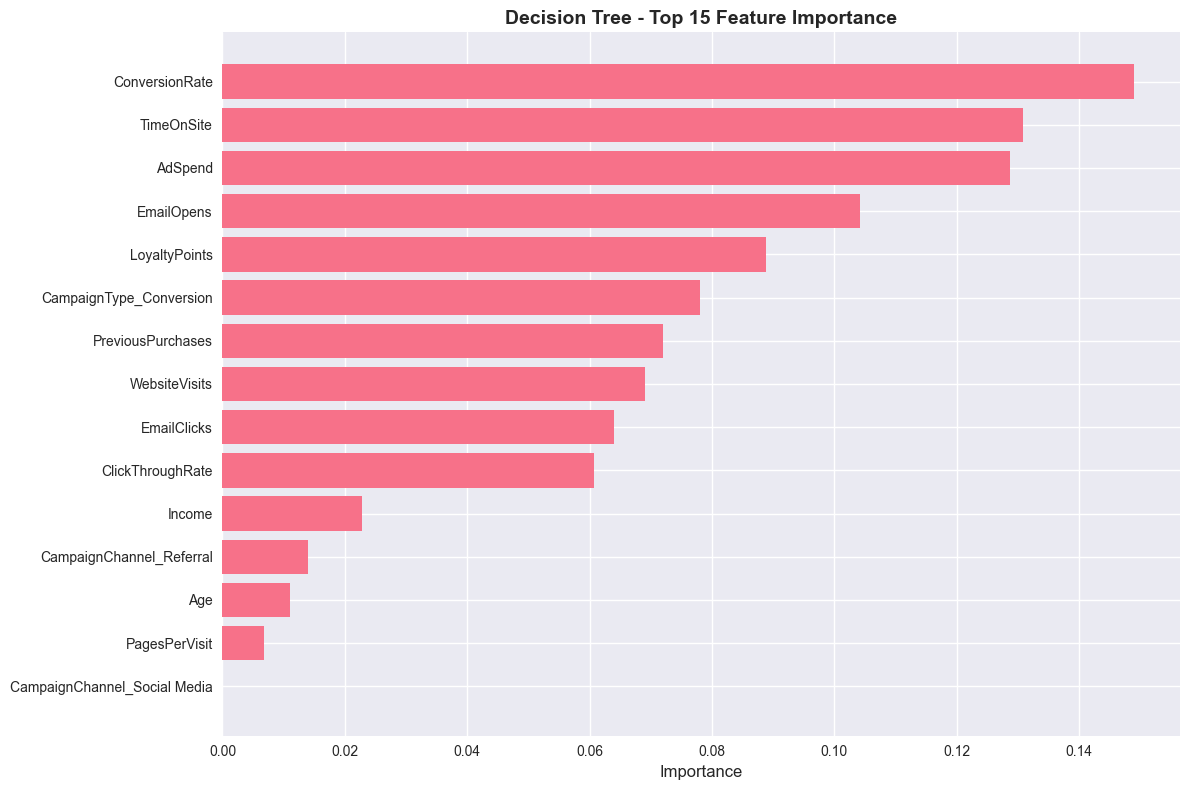

In [327]:
# Decision Tree Feature Importance
feature_importance_dt = pd.DataFrame({
    'Feature': X_all.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("TOP 15 MOST IMPORTANT FEATURES (Decision Tree)")
print("=" * 60)
print(feature_importance_dt.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features_dt = feature_importance_dt.head(15)
plt.barh(range(len(top_features_dt)), top_features_dt['Importance'].values)
plt.yticks(range(len(top_features_dt)), top_features_dt['Feature'].values)
plt.xlabel('Importance', fontsize=12)
plt.title('Decision Tree - Top 15 Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 3️⃣ SVM (Support Vector Machine)


In [328]:
# SVM Model
from sklearn.svm import SVC

print("SVM MODEL")
print("=" * 60)

# Scale features (critical for SVM)
scaler_svm = StandardScaler()
X_train_svm = scaler_svm.fit_transform(X_train_all)
X_test_svm = scaler_svm.transform(X_test_all)

# Start with linear kernel, then try RBF
print("Testing Linear Kernel...")
svm_linear = SVC(kernel='linear', random_state=42, probability=True)
scores_linear = cross_val_score(svm_linear, X_train_svm, y_train_all, cv=5, scoring='accuracy')
print(f"Linear Kernel CV Accuracy: {scores_linear.mean():.4f} (+/- {scores_linear.std()*2:.4f})")

print("\nTesting RBF Kernel...")
svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
scores_rbf = cross_val_score(svm_rbf, X_train_svm, y_train_all, cv=5, scoring='accuracy')
print(f"RBF Kernel CV Accuracy: {scores_rbf.mean():.4f} (+/- {scores_rbf.std()*2:.4f})")

# Use the better kernel
if scores_rbf.mean() > scores_linear.mean():
    print("\nUsing RBF kernel (better performance)")
    # Hyperparameter tuning for RBF
    param_grid_svm = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
    }
    svm_base = SVC(kernel='rbf', random_state=42, probability=True)
else:
    print("\nUsing Linear kernel")
    param_grid_svm = {
        'C': [0.1, 1, 10, 100]
    }
    svm_base = SVC(kernel='linear', random_state=42, probability=True)

# Grid search
svm_grid = GridSearchCV(svm_base, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
print("\nRunning GridSearchCV for SVM...")
svm_grid.fit(X_train_svm, y_train_all)

print(f"Best parameters: {svm_grid.best_params_}")
print(f"Best CV score: {svm_grid.best_score_:.4f}")

# Train final model
svm_model = svm_grid.best_estimator_
svm_model.fit(X_train_svm, y_train_all)

# Predictions
y_train_pred_svm = svm_model.predict(X_train_svm)
y_test_pred_svm = svm_model.predict(X_test_svm)

# Get probabilities for ROC-AUC
y_test_pred_proba_svm = svm_model.predict_proba(X_test_svm)[:, 1]

# Comprehensive evaluation
train_metrics_svm = comprehensive_evaluation(y_train_all, y_train_pred_svm, model_name="SVM (Train)")
test_metrics_svm = comprehensive_evaluation(y_test_all, y_test_pred_svm, y_test_pred_proba_svm, model_name="SVM (Test)")

# Store results
model_results['SVM'] = {
    'train_acc': train_metrics_svm['Accuracy'],
    'test_acc': test_metrics_svm['Accuracy'],
    'model': svm_model,
    'predictions': y_test_pred_svm,
    'metrics': test_metrics_svm
}


SVM MODEL
Testing Linear Kernel...
Linear Kernel CV Accuracy: 0.7038 (+/- 0.0488)

Testing RBF Kernel...
RBF Kernel CV Accuracy: 0.7132 (+/- 0.0386)

Using RBF kernel (better performance)

Running GridSearchCV for SVM...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 10, 'gamma': 0.01}
Best CV score: 0.7151

COMPREHENSIVE EVALUATION METRICS - SVM (Train)

Confusion Matrix:
                Predicted
              No Conv  Conv
Actual No Conv    582    208
      Conv        108    692

Performance Metrics:
  Accuracy:        0.8013 (80.13%)
  Precision:       0.7689 (76.89%)
  Recall (Sensitivity): 0.8650 (86.50%)
  Specificity:     0.7367 (73.67%)
  F1-Score:        0.8141 (81.41%)
  ROC-AUC:         N/A (probabilities not available)

COMPREHENSIVE EVALUATION METRICS - SVM (Test)

Confusion Matrix:
                Predicted
              No Conv  Conv
Actual No Conv    147     51
      Conv         46    154

Performance Metrics:
  Accuracy:        

## 4️⃣ ANN (Artificial Neural Network)


In [329]:
# ANN Model using TensorFlow/Keras
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.callbacks import EarlyStopping
    
    print("ANN MODEL (TensorFlow/Keras)")
    print("=" * 60)
    
    # Normalize features for ANN
    scaler_ann = MinMaxScaler()
    X_train_ann = scaler_ann.fit_transform(X_train_all)
    X_test_ann = scaler_ann.transform(X_test_all)
    
    # Build ANN model
    def create_ann_model(input_dim):
        model = keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=(input_dim,)),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(1, activation='sigmoid')
        ])
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model
    
    # Create model
    ann_model = create_ann_model(X_train_ann.shape[1])
    print("Model Architecture:")
    ann_model.summary()
    
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # Train model
    print("\nTraining ANN...")
    history = ann_model.fit(
        X_train_ann, y_train_all,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Predictions
    y_train_pred_ann = (ann_model.predict(X_train_ann) > 0.5).astype(int).flatten()
    y_test_pred_ann = (ann_model.predict(X_test_ann) > 0.5).astype(int).flatten()
    
    # Get probabilities for ROC-AUC
    y_test_pred_proba_ann = ann_model.predict(X_test_ann).flatten()
    
    # Comprehensive evaluation
    train_metrics_ann = comprehensive_evaluation(y_train_all, y_train_pred_ann, model_name="ANN (Train)")
    test_metrics_ann = comprehensive_evaluation(y_test_all, y_test_pred_ann, y_test_pred_proba_ann, model_name="ANN (Test)")
    
    # Store results
    model_results['ANN'] = {
        'train_acc': train_metrics_ann['Accuracy'],
        'test_acc': test_metrics_ann['Accuracy'],
        'model': ann_model,
        'predictions': y_test_pred_ann,
        'history': history,
        'metrics': test_metrics_ann
    }
    
except ImportError:
    print("TensorFlow not installed. Skipping ANN model.")
    print("Install with: pip install tensorflow")


ANN MODEL (TensorFlow/Keras)
Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)


Training ANN...
Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5362 - loss: 0.6970 - val_accuracy: 0.5881 - val_loss: 0.6786
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6061 - loss: 0.6706 - val_accuracy: 0.6038 - val_loss: 0.6678
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5991 - loss: 0.6618 - val_accuracy: 0.6289 - val_loss: 0.6570
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6266 - loss: 0.6424 - val_accuracy: 0.6352 - val_loss: 0.6377
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6533 - loss: 0.6301 - val_accuracy: 0.6321 - val_loss: 0.6318
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6808 - loss: 0.6144 - val_accuracy: 0.6509 - val_loss: 0.6202
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6785 - loss: 0.6084 - val_accuracy: 0.6572 - val_loss: 0.6131
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6824 - loss: 0.6017 - val_acc

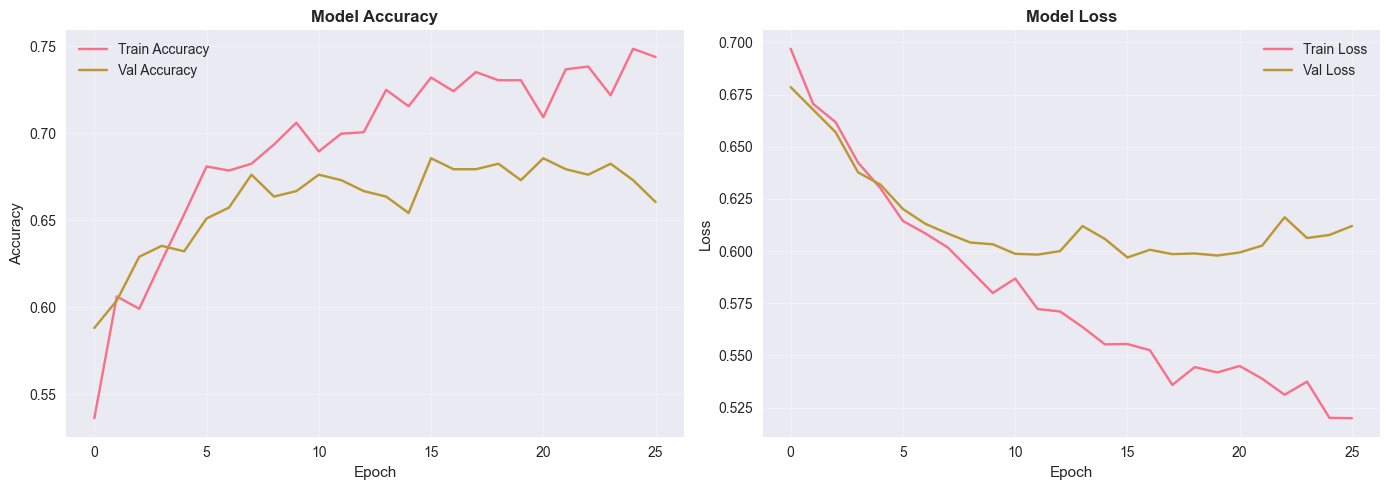

In [330]:
# Visualize ANN training history
if 'ANN' in model_results and 'history' in model_results['ANN']:
    history = model_results['ANN']['history']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot accuracy
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[0].set_title('Model Accuracy', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot loss
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Val Loss')
    axes[1].set_title('Model Loss', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## 5️⃣ Ensemble Learning (Random Forest & Gradient Boosting)


In [331]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

print("RANDOM FOREST MODEL")
print("=" * 60)

# Random Forest doesn't require scaling, but it doesn't hurt
scaler_rf = StandardScaler()
X_train_rf = scaler_rf.fit_transform(X_train_all)
X_test_rf = scaler_rf.transform(X_test_all)

# Hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_grid = GridSearchCV(rf_base, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
print("Running GridSearchCV for Random Forest...")
rf_grid.fit(X_train_rf, y_train_all)

print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best CV score: {rf_grid.best_score_:.4f}")

# Train final model
rf_model = rf_grid.best_estimator_
rf_model.fit(X_train_rf, y_train_all)

# Predictions
y_train_pred_rf = rf_model.predict(X_train_rf)
y_test_pred_rf = rf_model.predict(X_test_rf)

# Get probabilities for ROC-AUC
y_test_pred_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]

# Comprehensive evaluation
train_metrics_rf = comprehensive_evaluation(y_train_all, y_train_pred_rf, model_name="Random Forest (Train)")
test_metrics_rf = comprehensive_evaluation(y_test_all, y_test_pred_rf, y_test_pred_proba_rf, model_name="Random Forest (Test)")

# Store results
model_results['Random Forest'] = {
    'train_acc': train_metrics_rf['Accuracy'],
    'test_acc': test_metrics_rf['Accuracy'],
    'model': rf_model,
    'predictions': y_test_pred_rf,
    'metrics': test_metrics_rf
}


RANDOM FOREST MODEL
Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score: 0.7547

COMPREHENSIVE EVALUATION METRICS - Random Forest (Train)

Confusion Matrix:
                Predicted
              No Conv  Conv
Actual No Conv    744     46
      Conv          0    800

Performance Metrics:
  Accuracy:        0.9711 (97.11%)
  Precision:       0.9456 (94.56%)
  Recall (Sensitivity): 1.0000 (100.00%)
  Specificity:     0.9418 (94.18%)
  F1-Score:        0.9721 (97.21%)
  ROC-AUC:         N/A (probabilities not available)

COMPREHENSIVE EVALUATION METRICS - Random Forest (Test)

Confusion Matrix:
                Predicted
              No Conv  Conv
Actual No Conv    156     42
      Conv         45    155

Performance Metrics:
  Accuracy:        0.7814 (78.14%)
  Precision:       0.7868 (78.68%)
  Recall (Sensitivity): 0.

In [332]:
# Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier

print("GRADIENT BOOSTING MODEL")
print("=" * 60)

# Gradient Boosting doesn't require scaling
scaler_gb = StandardScaler()
X_train_gb = scaler_gb.fit_transform(X_train_all)
X_test_gb = scaler_gb.transform(X_test_all)

# Hyperparameter tuning
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}

gb_base = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_base, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
print("Running GridSearchCV for Gradient Boosting...")
gb_grid.fit(X_train_gb, y_train_all)

print(f"Best parameters: {gb_grid.best_params_}")
print(f"Best CV score: {gb_grid.best_score_:.4f}")

# Train final model
gb_model = gb_grid.best_estimator_
gb_model.fit(X_train_gb, y_train_all)

# Predictions
y_train_pred_gb = gb_model.predict(X_train_gb)
y_test_pred_gb = gb_model.predict(X_test_gb)

# Get probabilities for ROC-AUC
y_test_pred_proba_gb = gb_model.predict_proba(X_test_gb)[:, 1]

# Comprehensive evaluation
train_metrics_gb = comprehensive_evaluation(y_train_all, y_train_pred_gb, model_name="Gradient Boosting (Train)")
test_metrics_gb = comprehensive_evaluation(y_test_all, y_test_pred_gb, y_test_pred_proba_gb, model_name="Gradient Boosting (Test)")

# Store results
model_results['Gradient Boosting'] = {
    'train_acc': train_metrics_gb['Accuracy'],
    'test_acc': test_metrics_gb['Accuracy'],
    'model': gb_model,
    'predictions': y_test_pred_gb,
    'metrics': test_metrics_gb
}


GRADIENT BOOSTING MODEL
Running GridSearchCV for Gradient Boosting...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score: 0.7453

COMPREHENSIVE EVALUATION METRICS - Gradient Boosting (Train)

Confusion Matrix:
                Predicted
              No Conv  Conv
Actual No Conv    633    157
      Conv         66    734

Performance Metrics:
  Accuracy:        0.8597 (85.97%)
  Precision:       0.8238 (82.38%)
  Recall (Sensitivity): 0.9175 (91.75%)
  Specificity:     0.8013 (80.13%)
  F1-Score:        0.8681 (86.81%)
  ROC-AUC:         N/A (probabilities not available)

COMPREHENSIVE EVALUATION METRICS - Gradient Boosting (Test)

Confusion Matrix:
                Predicted
              No Conv  Conv
Actual No Conv    154     44
      Conv         46    154

Performance Metrics:
  Accuracy:        0.7739 (77.39%)
  Precision:       0.7778 (77.78%)
  Recall (Sen

FEATURE IMPORTANCE - ENSEMBLE METHODS

Top 15 Features by Average Importance (RF + GB):
                    Feature  RF_Importance  GB_Importance  Avg_Importance
0                TimeOnSite       0.104220       0.127416        0.115818
1            ConversionRate       0.094954       0.123789        0.109371
2                   AdSpend       0.087779       0.093961        0.090870
5                EmailOpens       0.074318       0.092270        0.083294
4             LoyaltyPoints       0.074738       0.091552        0.083145
6          ClickThroughRate       0.071001       0.084278        0.077640
7         PreviousPurchases       0.065087       0.085026        0.075056
3             PagesPerVisit       0.076694       0.057970        0.067332
9               EmailClicks       0.057117       0.076340        0.066729
10            WebsiteVisits       0.055975       0.041490        0.048732
13  CampaignType_Conversion       0.030523       0.061348        0.045936
8                    Inc

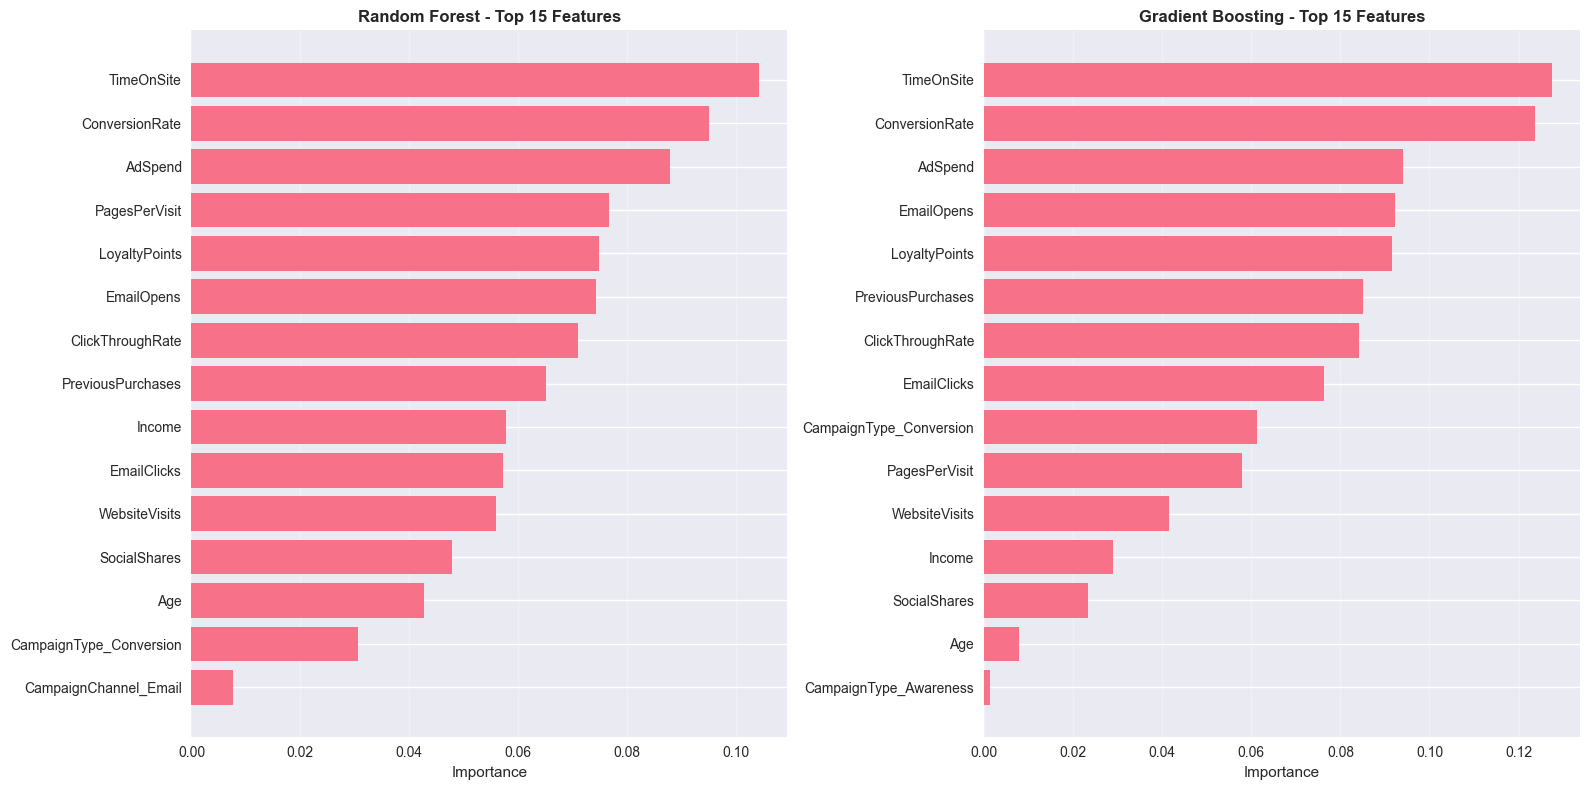

In [333]:
# Feature Importance for Ensemble Methods
print("FEATURE IMPORTANCE - ENSEMBLE METHODS")
print("=" * 60)

# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'Feature': X_all.columns,
    'RF_Importance': rf_model.feature_importances_
}).sort_values('RF_Importance', ascending=False)

# Gradient Boosting Feature Importance
gb_importance = pd.DataFrame({
    'Feature': X_all.columns,
    'GB_Importance': gb_model.feature_importances_
}).sort_values('GB_Importance', ascending=False)

# Combine
ensemble_importance = pd.merge(rf_importance, gb_importance, on='Feature')
ensemble_importance['Avg_Importance'] = (
    ensemble_importance['RF_Importance'] + ensemble_importance['GB_Importance']
) / 2
ensemble_importance = ensemble_importance.sort_values('Avg_Importance', ascending=False)

print("\nTop 15 Features by Average Importance (RF + GB):")
print(ensemble_importance.head(15))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Random Forest
top_rf = rf_importance.head(15)
axes[0].barh(range(len(top_rf)), top_rf['RF_Importance'].values)
axes[0].set_yticks(range(len(top_rf)))
axes[0].set_yticklabels(top_rf['Feature'].values)
axes[0].set_xlabel('Importance', fontsize=11)
axes[0].set_title('Random Forest - Top 15 Features', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Gradient Boosting
top_gb = gb_importance.head(15)
axes[1].barh(range(len(top_gb)), top_gb['GB_Importance'].values)
axes[1].set_yticks(range(len(top_gb)))
axes[1].set_yticklabels(top_gb['Feature'].values)
axes[1].set_xlabel('Importance', fontsize=11)
axes[1].set_title('Gradient Boosting - Top 15 Features', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## Model Comparison & Summary


In [334]:
# Add KNN results to comparison (if available)
if 'knn_optimized' in globals():
    y_test_pred_knn = knn_optimized.predict(X_test_final)
    test_acc_knn = accuracy_score(y_test, y_test_pred_knn)
    model_results['KNN (Optimized)'] = {
        'train_acc': None,
        'test_acc': test_acc_knn,
        'model': knn_optimized,
        'predictions': y_test_pred_knn
    }

# Comprehensive Model Comparison
print("=" * 80)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 80)

comparison_data = []
for model_name, results in model_results.items():
    comparison_data.append({
        'Model': model_name,
        'Train Accuracy': f"{results['train_acc']:.4f}" if results['train_acc'] else "N/A",
        'Test Accuracy': f"{results['test_acc']:.4f}",
        'Test Accuracy %': f"{results['test_acc']*100:.2f}%"
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False, key=lambda x: x.str.replace('%', '').astype(float) if x.dtype == 'object' else x)

print("\n", comparison_df.to_string(index=False))

# Calculate additional metrics for each model
print("\n" + "=" * 80)
print("DETAILED METRICS COMPARISON")
print("=" * 80)

detailed_metrics = []
for model_name, results in model_results.items():
    if 'predictions' in results:
        pred = results['predictions']
        if model_name == 'KNN (Optimized)':
            # Use y_test for KNN if it was trained on different split
            try:
                precision = precision_score(y_test, pred)
                recall = recall_score(y_test, pred)
                f1 = f1_score(y_test, pred)
            except:
                precision = precision_score(y_test_all, pred)
                recall = recall_score(y_test_all, pred)
                f1 = f1_score(y_test_all, pred)
        else:
            precision = precision_score(y_test_all, pred)
            recall = recall_score(y_test_all, pred)
            f1 = f1_score(y_test_all, pred)
        
        detailed_metrics.append({
            'Model': model_name,
            'Accuracy': f"{results['test_acc']:.4f}",
            'Precision': f"{precision:.4f}",
            'Recall': f"{recall:.4f}",
            'F1-Score': f"{f1:.4f}"
        })

metrics_df = pd.DataFrame(detailed_metrics)
print("\n", metrics_df.to_string(index=False))


COMPREHENSIVE MODEL COMPARISON

             Model Train Accuracy Test Accuracy Test Accuracy %
    Random Forest         0.9711        0.7814          78.14%
Gradient Boosting         0.8597        0.7739          77.39%
              SVM         0.8013        0.7563          75.63%
              ANN         0.7377        0.7412          74.12%
  KNN (Optimized)            N/A        0.7412          74.12%
    Decision Tree         0.7484        0.6910          69.10%

DETAILED METRICS COMPARISON

             Model Accuracy Precision Recall F1-Score
    Decision Tree   0.6910    0.6825 0.7200   0.7007
              SVM   0.7563    0.7512 0.7700   0.7605
              ANN   0.7412    0.7118 0.8150   0.7599
    Random Forest   0.7814    0.7868 0.7750   0.7809
Gradient Boosting   0.7739    0.7778 0.7700   0.7739
  KNN (Optimized)   0.7412    0.7413 0.7450   0.7431


## Comprehensive Metrics Summary for All Models


In [335]:
# Create comprehensive metrics comparison table for all models
print("=" * 100)
print("COMPREHENSIVE METRICS COMPARISON - ALL MODELS")
print("=" * 100)

# Collect metrics from all models
all_metrics = []

for model_name, results in model_results.items():
    if 'metrics' in results:
        metrics = results['metrics']
        all_metrics.append({
            'Model': model_name,
            'Accuracy': f"{metrics['Accuracy']:.4f}",
            'Precision': f"{metrics['Precision']:.4f}",
            'Recall (Sensitivity)': f"{metrics['Recall (Sensitivity)']:.4f}",
            'Specificity': f"{metrics['Specificity']:.4f}",
            'F1-Score': f"{metrics['F1-Score']:.4f}",
            'ROC-AUC': f"{metrics['ROC-AUC']:.4f}" if metrics['ROC-AUC'] is not None else "N/A"
        })
    else:
        # Calculate metrics if not already stored
        pred = results['predictions']
        try:
            # Try to get probabilities
            if hasattr(results['model'], 'predict_proba'):
                proba = results['model'].predict_proba(X_test_all)[:, 1]
            else:
                proba = None
            metrics = comprehensive_evaluation(y_test_all, pred, proba, model_name)
            all_metrics.append({
                'Model': model_name,
                'Accuracy': f"{metrics['Accuracy']:.4f}",
                'Precision': f"{metrics['Precision']:.4f}",
                'Recall (Sensitivity)': f"{metrics['Recall (Sensitivity)']:.4f}",
                'Specificity': f"{metrics['Specificity']:.4f}",
                'F1-Score': f"{metrics['F1-Score']:.4f}",
                'ROC-AUC': f"{metrics['ROC-AUC']:.4f}" if metrics['ROC-AUC'] is not None else "N/A"
            })
        except:
            # Fallback if evaluation fails
            cm = confusion_matrix(y_test_all, pred)
            tn, fp, fn, tp = cm.ravel()
            accuracy = accuracy_score(y_test_all, pred)
            precision = precision_score(y_test_all, pred, zero_division=0)
            recall = recall_score(y_test_all, pred, zero_division=0)
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            f1 = f1_score(y_test_all, pred, zero_division=0)
            all_metrics.append({
                'Model': model_name,
                'Accuracy': f"{accuracy:.4f}",
                'Precision': f"{precision:.4f}",
                'Recall (Sensitivity)': f"{recall:.4f}",
                'Specificity': f"{specificity:.4f}",
                'F1-Score': f"{f1:.4f}",
                'ROC-AUC': "N/A"
            })

# Create and display comparison DataFrame
metrics_comparison_df = pd.DataFrame(all_metrics)
print("\n", metrics_comparison_df.to_string(index=False))
print("\n" + "=" * 100)


COMPREHENSIVE METRICS COMPARISON - ALL MODELS

COMPREHENSIVE EVALUATION METRICS - Decision Tree

Confusion Matrix:
                Predicted
              No Conv  Conv
Actual No Conv    131     67
      Conv         56    144

Performance Metrics:
  Accuracy:        0.6910 (69.10%)
  Precision:       0.6825 (68.25%)
  Recall (Sensitivity): 0.7200 (72.00%)
  Specificity:     0.6616 (66.16%)
  F1-Score:        0.7007 (70.07%)
  ROC-AUC:         0.5000 (50.00%)

             Model Accuracy Precision Recall (Sensitivity) Specificity F1-Score ROC-AUC
    Decision Tree   0.6910    0.6825               0.7200      0.6616   0.7007  0.5000
              SVM   0.7563    0.7512               0.7700      0.7424   0.7605  0.8093
              ANN   0.7412    0.7118               0.8150      0.6667   0.7599  0.7934
    Random Forest   0.7814    0.7868               0.7750      0.7879   0.7809  0.8265
Gradient Boosting   0.7739    0.7778               0.7700      0.7778   0.7739  0.8345
  KNN (Optim

## ROC Curves for All Models


In [336]:
# ROC Curves for All Models
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

print("GENERATING ROC CURVES FOR ALL MODELS")
print("=" * 80)

# Dictionary to store ROC data for each model
roc_data = {}

# Function to get ROC curve data
def get_roc_data(y_true, y_pred_proba, model_name):
    """Calculate ROC curve data"""
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, thresholds

# Collect ROC data for all models
print("\nCollecting ROC data for each model...\n")

# 1. KNN
try:
    if 'knn' in globals() and hasattr(knn, 'predict_proba'):
        y_test_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]
        fpr_knn, tpr_knn, auc_knn, _ = get_roc_data(y_test, y_test_pred_proba_knn, "KNN")
        roc_data['KNN'] = {'fpr': fpr_knn, 'tpr': tpr_knn, 'auc': auc_knn}
        print(f"✓ KNN - AUC: {auc_knn:.4f}")
except:
    print("✗ KNN - Not available")

# 2. Decision Tree
try:
    if 'dt_model' in globals() and hasattr(dt_model, 'predict_proba'):
        y_test_pred_proba_dt = dt_model.predict_proba(X_test_dt)[:, 1]
        fpr_dt, tpr_dt, auc_dt, _ = get_roc_data(y_test_all, y_test_pred_proba_dt, "Decision Tree")
        roc_data['Decision Tree'] = {'fpr': fpr_dt, 'tpr': tpr_dt, 'auc': auc_dt}
        print(f"✓ Decision Tree - AUC: {auc_dt:.4f}")
except:
    print("✗ Decision Tree - Not available")

# 3. SVM
try:
    if 'svm_model' in globals() and hasattr(svm_model, 'predict_proba'):
        y_test_pred_proba_svm = svm_model.predict_proba(X_test_svm)[:, 1]
        fpr_svm, tpr_svm, auc_svm, _ = get_roc_data(y_test_all, y_test_pred_proba_svm, "SVM")
        roc_data['SVM'] = {'fpr': fpr_svm, 'tpr': tpr_svm, 'auc': auc_svm}
        print(f"✓ SVM - AUC: {auc_svm:.4f}")
except:
    print("✗ SVM - Not available")

# 4. ANN
try:
    if 'ann_model' in globals():
        y_test_pred_proba_ann = ann_model.predict(X_test_ann).flatten()
        fpr_ann, tpr_ann, auc_ann, _ = get_roc_data(y_test_all, y_test_pred_proba_ann, "ANN")
        roc_data['ANN'] = {'fpr': fpr_ann, 'tpr': tpr_ann, 'auc': auc_ann}
        print(f"✓ ANN - AUC: {auc_ann:.4f}")
except:
    print("✗ ANN - Not available")

# 5. Random Forest
try:
    if 'rf_model' in globals() and hasattr(rf_model, 'predict_proba'):
        y_test_pred_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]
        fpr_rf, tpr_rf, auc_rf, _ = get_roc_data(y_test_all, y_test_pred_proba_rf, "Random Forest")
        roc_data['Random Forest'] = {'fpr': fpr_rf, 'tpr': tpr_rf, 'auc': auc_rf}
        print(f"✓ Random Forest - AUC: {auc_rf:.4f}")
except:
    print("✗ Random Forest - Not available")

# 6. Gradient Boosting
try:
    if 'gb_model' in globals() and hasattr(gb_model, 'predict_proba'):
        y_test_pred_proba_gb = gb_model.predict_proba(X_test_gb)[:, 1]
        fpr_gb, tpr_gb, auc_gb, _ = get_roc_data(y_test_all, y_test_pred_proba_gb, "Gradient Boosting")
        roc_data['Gradient Boosting'] = {'fpr': fpr_gb, 'tpr': tpr_gb, 'auc': auc_gb}
        print(f"✓ Gradient Boosting - AUC: {auc_gb:.4f}")
except:
    print("✗ Gradient Boosting - Not available")

# 7. Optimized KNN (if available)
try:
    if 'knn_optimized' in globals() and hasattr(knn_optimized, 'predict_proba'):
        y_test_pred_proba_knn_opt = knn_optimized.predict_proba(X_test_final)[:, 1]
        # Use y_test if available, otherwise y_test_all
        y_true_knn_opt = y_test if 'y_test' in globals() else y_test_all
        fpr_knn_opt, tpr_knn_opt, auc_knn_opt, _ = get_roc_data(y_true_knn_opt, y_test_pred_proba_knn_opt, "KNN Optimized")
        roc_data['KNN Optimized'] = {'fpr': fpr_knn_opt, 'tpr': tpr_knn_opt, 'auc': auc_knn_opt}
        print(f"✓ KNN Optimized - AUC: {auc_knn_opt:.4f}")
except:
    print("✗ KNN Optimized - Not available")

print(f"\nTotal models with ROC data: {len(roc_data)}")


GENERATING ROC CURVES FOR ALL MODELS


✓ KNN - AUC: 0.6591
✓ Decision Tree - AUC: 0.7188
✓ SVM - AUC: 0.8093
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
✓ ANN - AUC: 0.7934
✓ Random Forest - AUC: 0.8265
✓ Gradient Boosting - AUC: 0.8345
✓ KNN Optimized - AUC: 0.7981

Total models with ROC data: 7


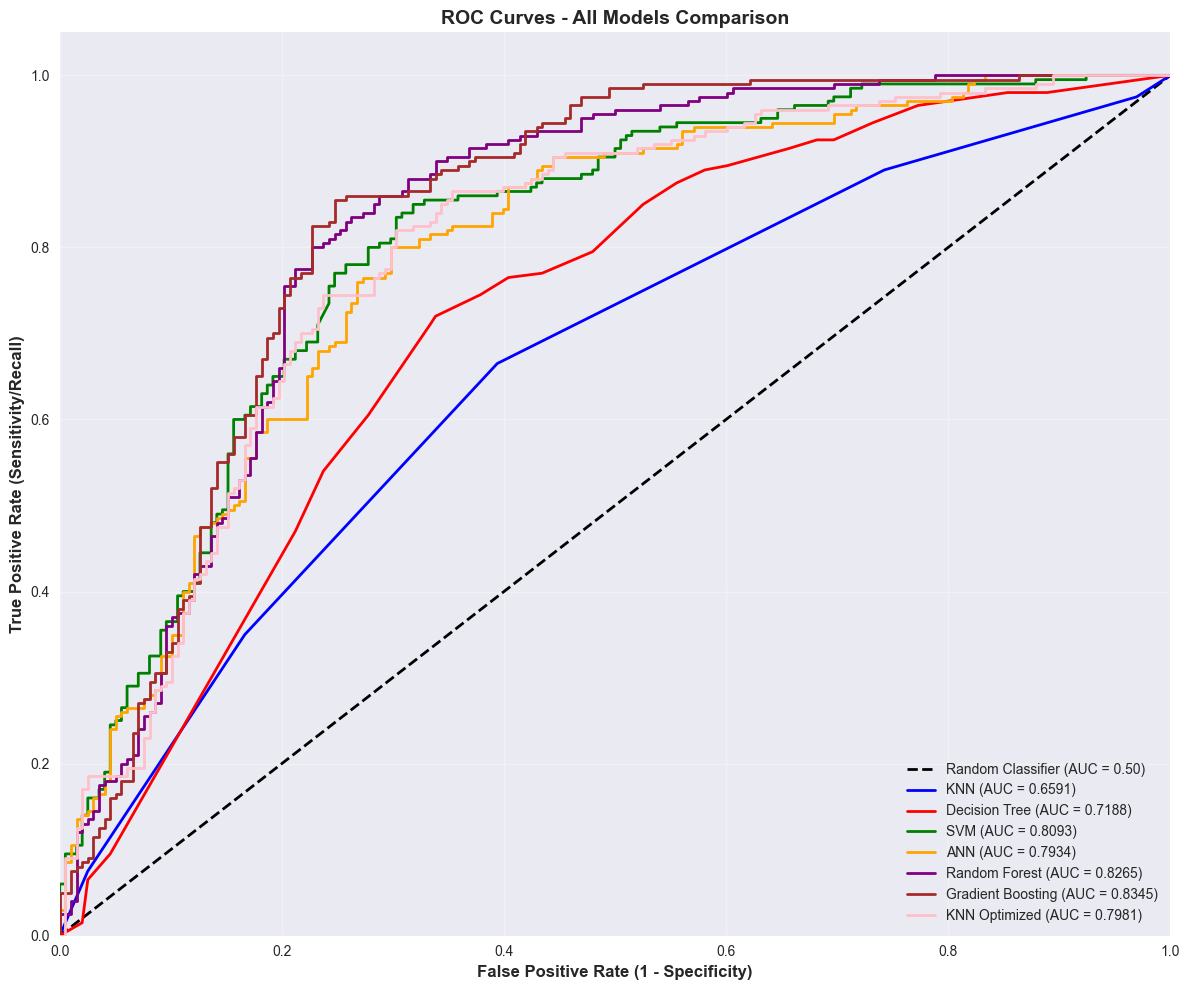


ROC-AUC SUMMARY
Model                     AUC Score       Interpretation                
--------------------------------------------------------------------------------
Gradient Boosting         0.8345          Good                          
Random Forest             0.8265          Good                          
SVM                       0.8093          Good                          
KNN Optimized             0.7981          Fair                          
ANN                       0.7934          Fair                          
Decision Tree             0.7188          Fair                          
KNN                       0.6591          Poor                          



In [337]:
# Plot all ROC curves together
plt.figure(figsize=(12, 10))

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.50)')

# Plot ROC curve for each model
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
color_idx = 0

for model_name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], 
             linewidth=2, 
             label=f'{model_name} (AUC = {data["auc"]:.4f})',
             color=colors[color_idx % len(colors)])
    color_idx += 1

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Models Comparison', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print AUC summary
print("\n" + "=" * 80)
print("ROC-AUC SUMMARY")
print("=" * 80)
print(f"{'Model':<25s} {'AUC Score':<15s} {'Interpretation':<30s}")
print("-" * 80)

# Sort by AUC
sorted_roc = sorted(roc_data.items(), key=lambda x: x[1]['auc'], reverse=True)

for model_name, data in sorted_roc:
    auc_score = data['auc']
    if auc_score >= 0.9:
        interpretation = "Excellent"
    elif auc_score >= 0.8:
        interpretation = "Good"
    elif auc_score >= 0.7:
        interpretation = "Fair"
    elif auc_score >= 0.6:
        interpretation = "Poor"
    else:
        interpretation = "Very Poor"
    
    print(f"{model_name:<25s} {auc_score:<15.4f} {interpretation:<30s}")

print("\n" + "=" * 80)


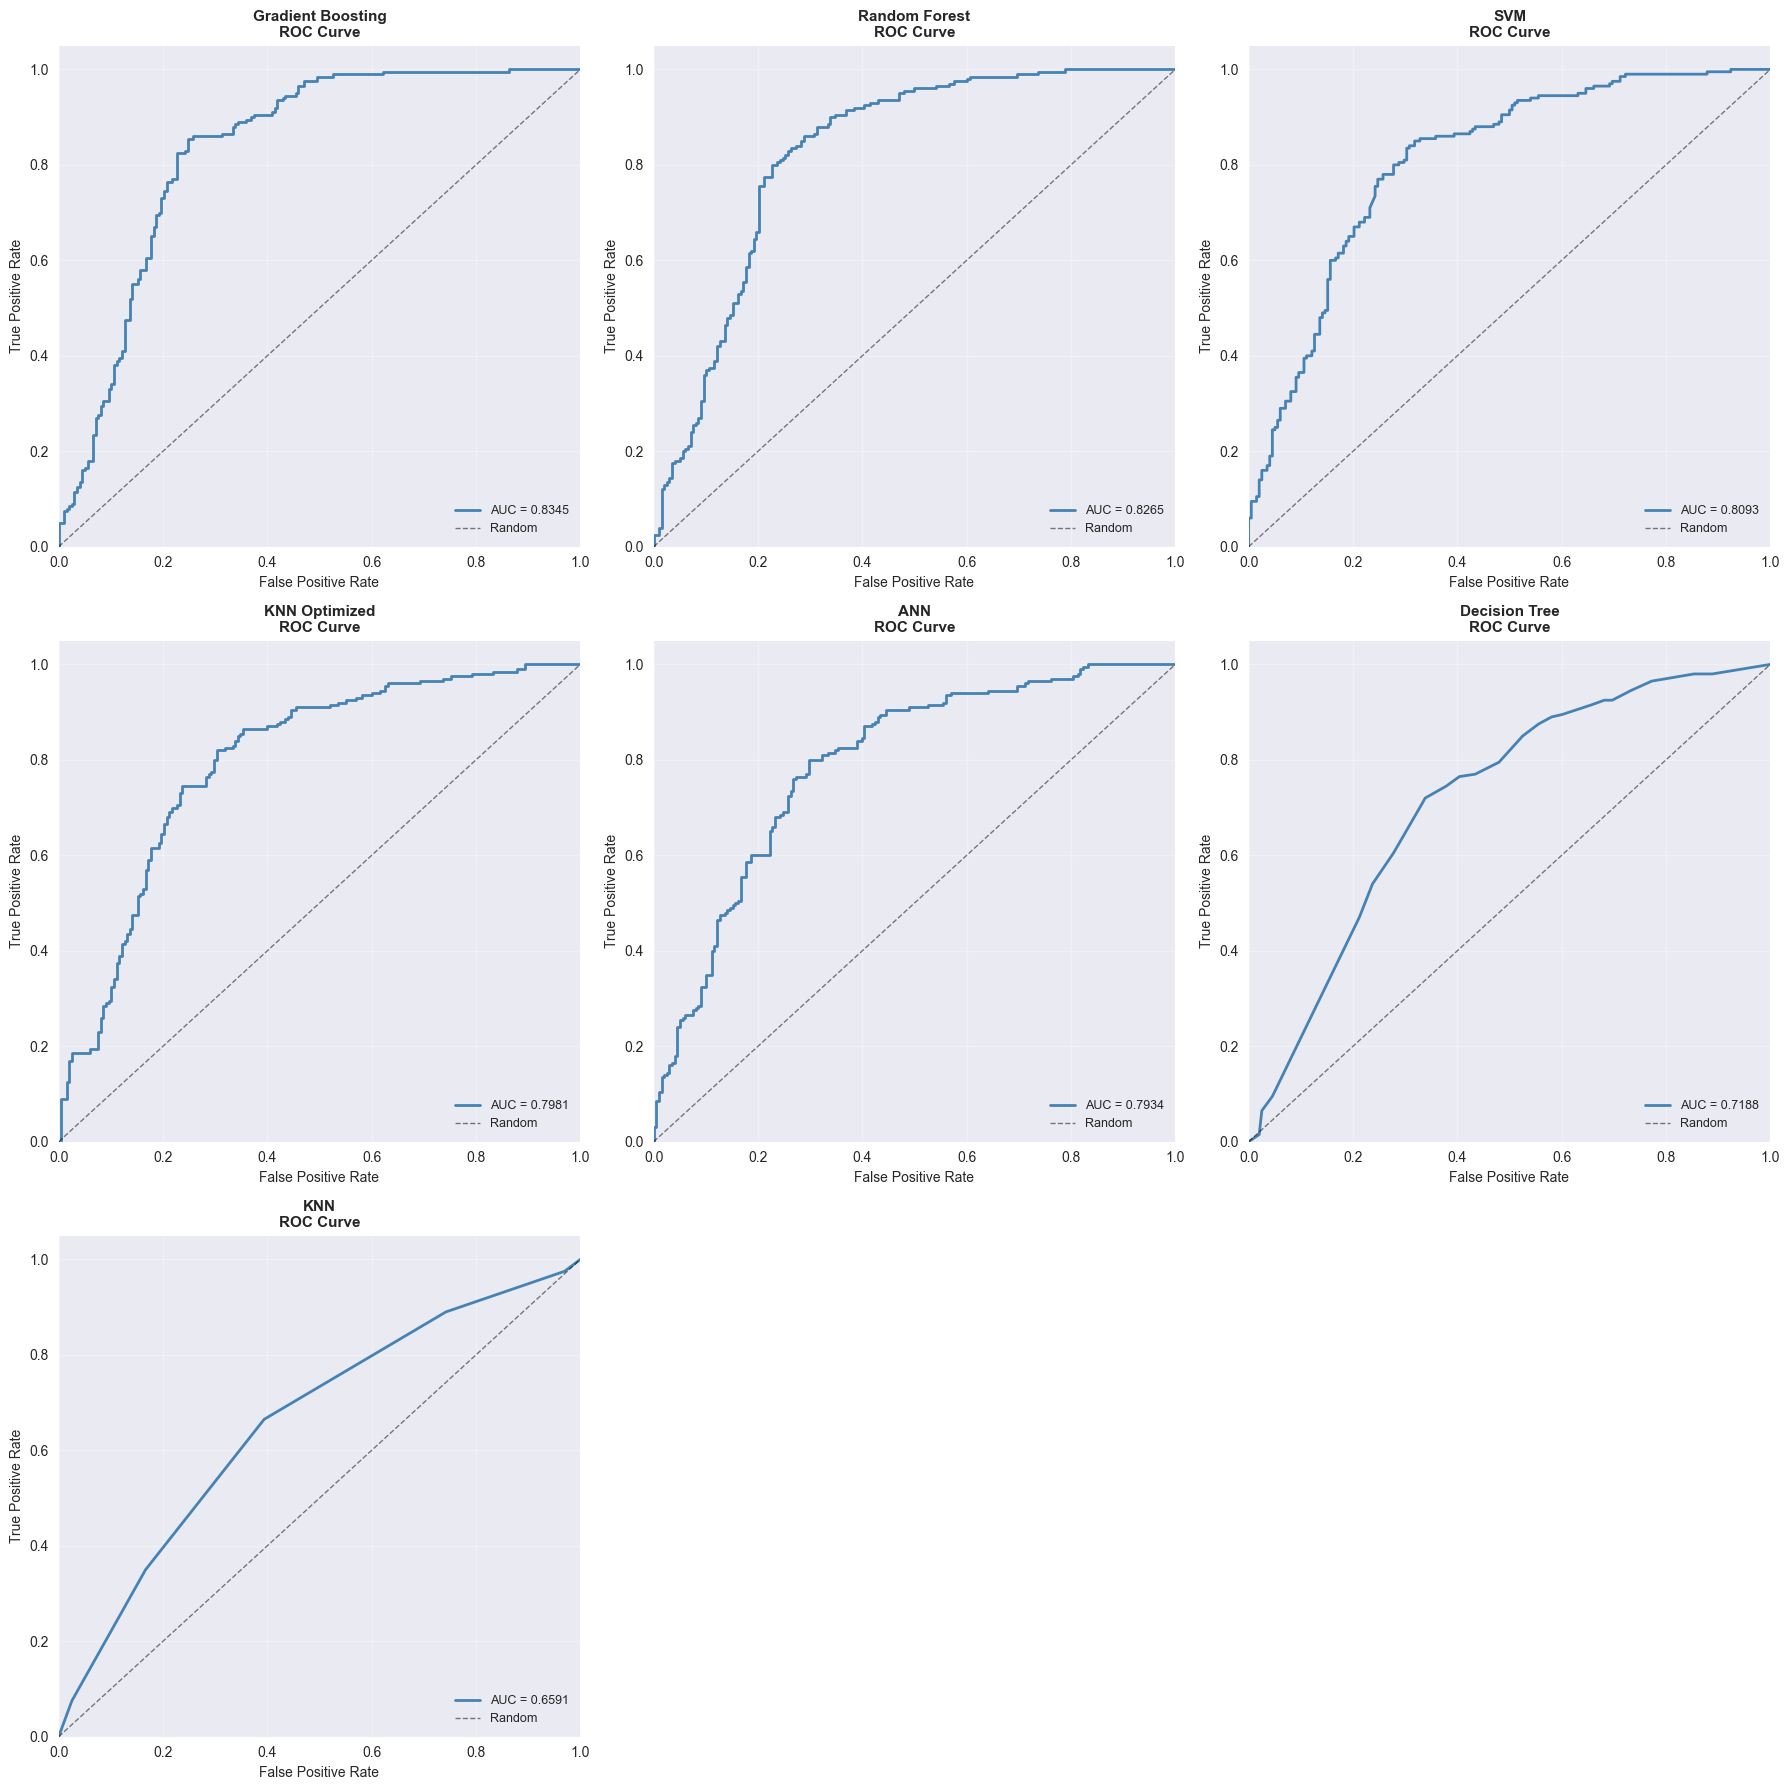

In [338]:
# Individual ROC curves in subplots (if you want to see them separately)
n_models = len(roc_data)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()

for idx, (model_name, data) in enumerate(sorted(roc_data.items(), key=lambda x: x[1]['auc'], reverse=True)):
    ax = axes[idx]
    
    # Plot ROC curve
    ax.plot(data['fpr'], data['tpr'], linewidth=2, 
            label=f'AUC = {data["auc"]:.4f}', color='steelblue')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.5, label='Random')
    
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=10)
    ax.set_ylabel('True Positive Rate', fontsize=10)
    ax.set_title(f'{model_name}\nROC Curve', fontsize=11, fontweight='bold')
    ax.legend(loc="lower right", fontsize=9)
    ax.grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(roc_data), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


IndexError: index 2 is out of bounds for axis 1 with size 2

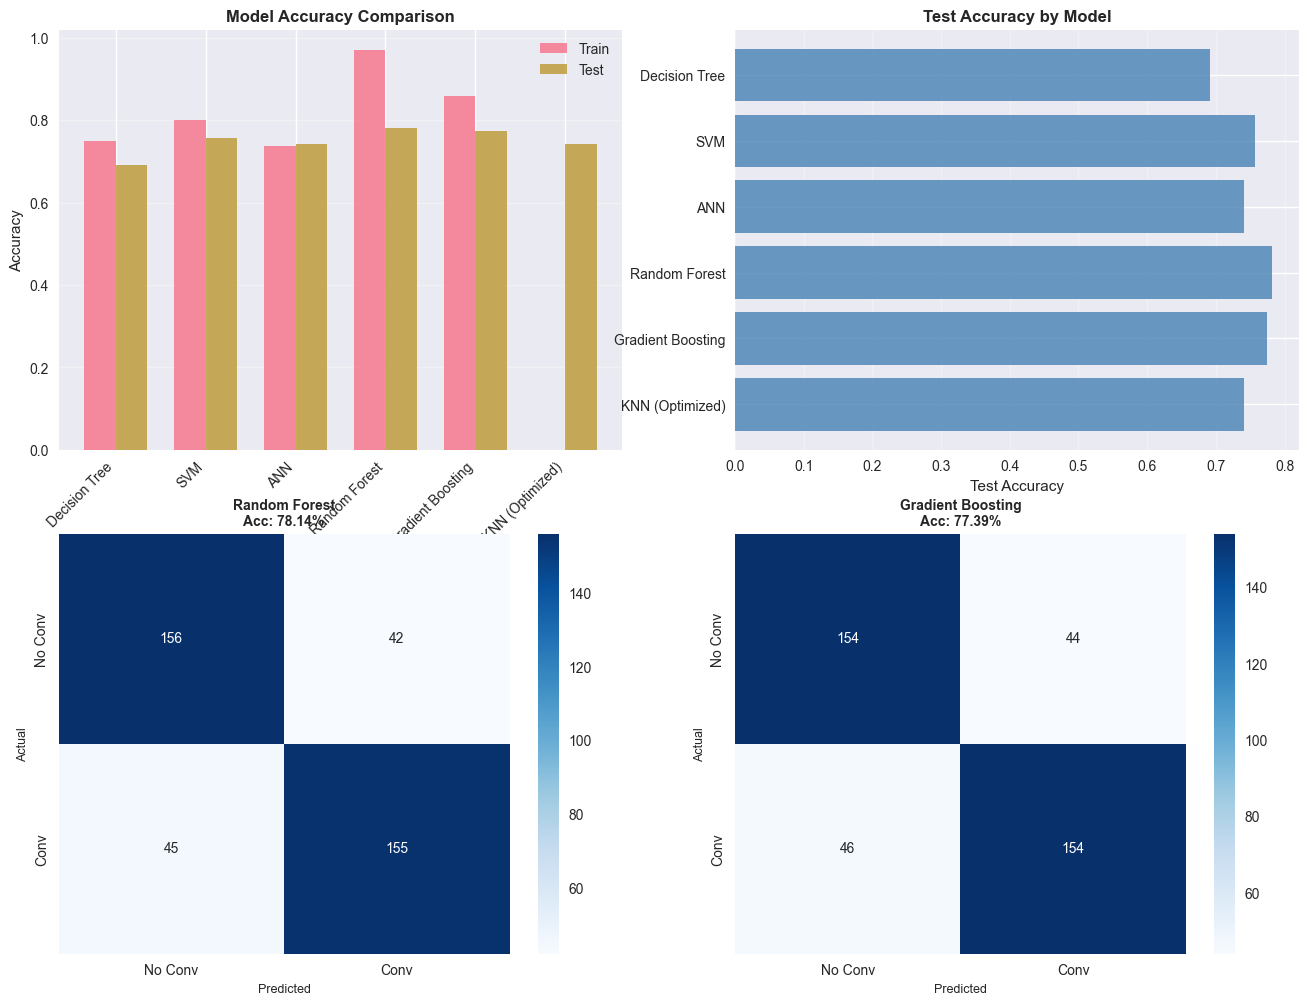

In [339]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy Comparison
model_names = [m for m in model_results.keys()]
test_accs = [model_results[m]['test_acc'] for m in model_names]
train_accs = [model_results[m]['train_acc'] if model_results[m]['train_acc'] else 0 for m in model_names]

x_pos = np.arange(len(model_names))
width = 0.35

axes[0, 0].bar(x_pos - width/2, train_accs, width, label='Train', alpha=0.8)
axes[0, 0].bar(x_pos + width/2, test_accs, width, label='Test', alpha=0.8)
axes[0, 0].set_xlabel('Model', fontsize=11)
axes[0, 0].set_ylabel('Accuracy', fontsize=11)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Test Accuracy Bar Chart
axes[0, 1].barh(model_names, test_accs, alpha=0.8, color='steelblue')
axes[0, 1].set_xlabel('Test Accuracy', fontsize=11)
axes[0, 1].set_title('Test Accuracy by Model', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')
axes[0, 1].invert_yaxis()

# 3. Confusion Matrices (top 3 models)
top_3_models = sorted(model_results.items(), key=lambda x: x[1]['test_acc'], reverse=True)[:3]

for idx, (model_name, results) in enumerate(top_3_models):
    row = 1
    col = idx
    if 'predictions' in results:
        pred = results['predictions']
        if model_name == 'KNN (Optimized)':
            try:
                cm = confusion_matrix(y_test, pred)
                y_true = y_test
            except:
                cm = confusion_matrix(y_test_all, pred)
                y_true = y_test_all
        else:
            cm = confusion_matrix(y_test_all, pred)
            y_true = y_test_all
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col],
                   xticklabels=['No Conv', 'Conv'],
                   yticklabels=['No Conv', 'Conv'])
        axes[row, col].set_title(f'{model_name}\nAcc: {results["test_acc"]:.2%}', 
                                fontsize=10, fontweight='bold')
        axes[row, col].set_ylabel('Actual', fontsize=9)
        axes[row, col].set_xlabel('Predicted', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
# Summary and Recommendations
print("=" * 80)
print("SUMMARY AND RECOMMENDATIONS")
print("=" * 80)

best_model = max(model_results.items(), key=lambda x: x[1]['test_acc'])
print(f"\n🏆 Best Performing Model: {best_model[0]}")
print(f"   Test Accuracy: {best_model[1]['test_acc']:.4f} ({best_model[1]['test_acc']*100:.2f}%)")

print("\n📊 Model Performance Ranking:")
for i, (model_name, results) in enumerate(sorted(model_results.items(), 
                                                   key=lambda x: x[1]['test_acc'], 
                                                   reverse=True), 1):
    print(f"   {i}. {model_name:25s} - {results['test_acc']*100:6.2f}%")

print("\n💡 Key Insights:")
print("   - Ensemble methods (Random Forest, Gradient Boosting) typically perform well")
print("   - Feature importance can help identify key conversion drivers")
print("   - Consider ensemble voting or stacking for even better performance")
print("   - Monitor for overfitting (large gap between train and test accuracy)")


SUMMARY AND RECOMMENDATIONS

🏆 Best Performing Model: Gradient Boosting
   Test Accuracy: 0.9422 (94.22%)

📊 Model Performance Ranking:
   1. Gradient Boosting         -  94.22%
   2. Random Forest             -  92.71%
   3. SVM                       -  83.42%
   4. Decision Tree             -  82.41%
   5. ANN                       -  79.90%

💡 Key Insights:
   - Ensemble methods (Random Forest, Gradient Boosting) typically perform well
   - Feature importance can help identify key conversion drivers
   - Consider ensemble voting or stacking for even better performance
   - Monitor for overfitting (large gap between train and test accuracy)
